In [1]:
import pandas as pd
import numpy as np

#훈련데이터 읽어오기
trn = pd.read_csv('./input/train_ver2.csv')

C:\Users\woojung\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#데이터 크기 확인
trn.shape
#13647309 고객 데이터, 48개의 변수(특징)

(13647309, 48)

In [3]:
trn.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
#모든 변수 미리 보기
## 데이터 타입 같이 확인 가능 -> 데이터 변환 필요
## N/A 제거해야겠구나
#for col in trn.columns:
#    print('{}\n'.format(trn[col].head()))

In [5]:
trn.info()
#24개는 고객 관련 변수, 24개의 금융 제품 변수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [6]:
#수치형 변수 알아보기 _describe()
num_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['int64','float64']]
trn[num_cols].describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


In [7]:
#범주형 변수 살펴보기
cat_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['O']]
trn[cat_cols].describe()

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


In [8]:
# 범주형 변수의 고유값 직접 출력해보기
for col in cat_cols:
    uniq = np.unique(trn[col].astype(str))
    print('-' * 50)
    print("# col {}, n_uniq {}, uniq {}".format(col, len(uniq), uniq))

--------------------------------------------------
# col fecha_dato, n_uniq 17, uniq ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado, n_uniq 6, uniq ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# col pais_residencia, n_uniq 119, uniq ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'Q

--------------------------------------------------
# col indrel_1mes, n_uniq 10, uniq ['1' '1.0' '2' '2.0' '3' '3.0' '4' '4.0' 'P' 'nan']
--------------------------------------------------
# col tiprel_1mes, n_uniq 6, uniq ['A' 'I' 'N' 'P' 'R' 'nan']
--------------------------------------------------
# col indresi, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
# col indext, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
# col conyuemp, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
# col canal_entrada, n_uniq 163, uniq ['004' '007' '013' '025' 'K00' 'KAA' 'KAB' 'KAC' 'KAD' 'KAE' 'KAF' 'KAG'
 'KAH' 'KAI' 'KAJ' 'KAK' 'KAL' 'KAM' 'KAN' 'KAO' 'KAP' 'KAQ' 'KAR' 'KAS'
 'KAT' 'KAU' 'KAV' 'KAW' 'KAY' 'KAZ' 'KBB' 'KBD' 'KBE' 'KBF' 'KBG' 'KBH'
 'KBJ' 'KBL' 'KBM' 'KBN' 'KBO' 'KBP' 'KBQ' 'KBR' 'KBS' 'KBU' 'KBV' 'KBW'
 'KBX' 'KBY' 'KBZ' 'KCA' 'KCB' 'KCC' 'KCD' 'KCE' 'KCF' 'KCG' 'KCH' 'KCI'
 'KC

### 시각화 데이터로 알아보기

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
C:\Users\woojung\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


--------------------------------------------------
col:  fecha_dato


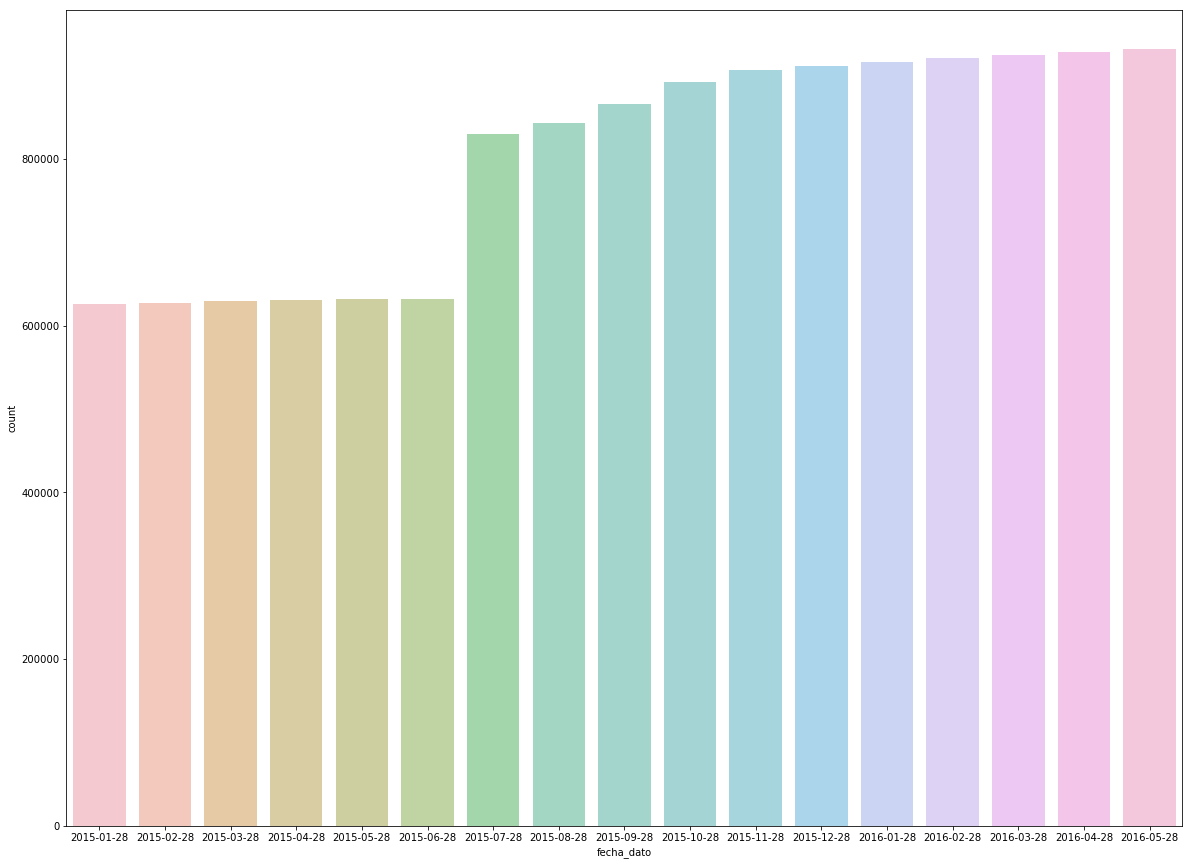

--------------------------------------------------
col:  ind_empleado


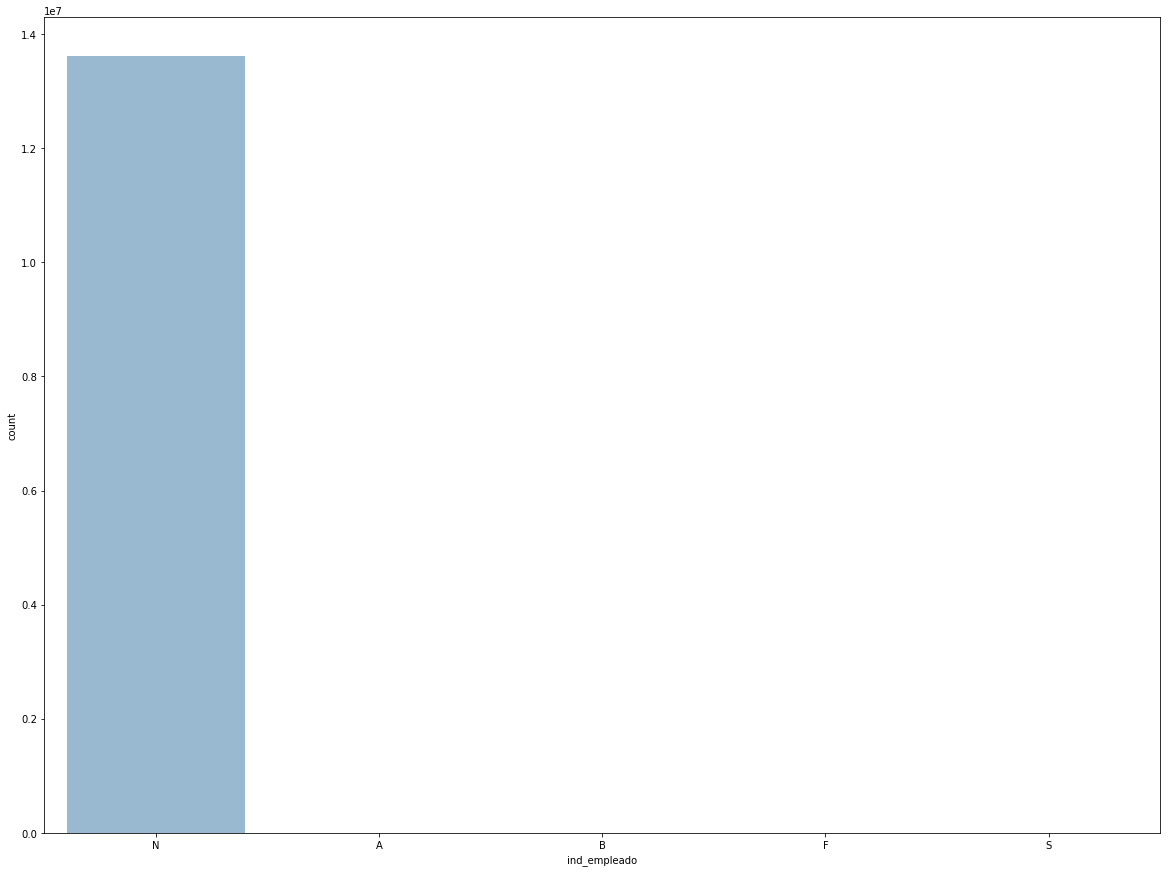

--------------------------------------------------
col:  pais_residencia


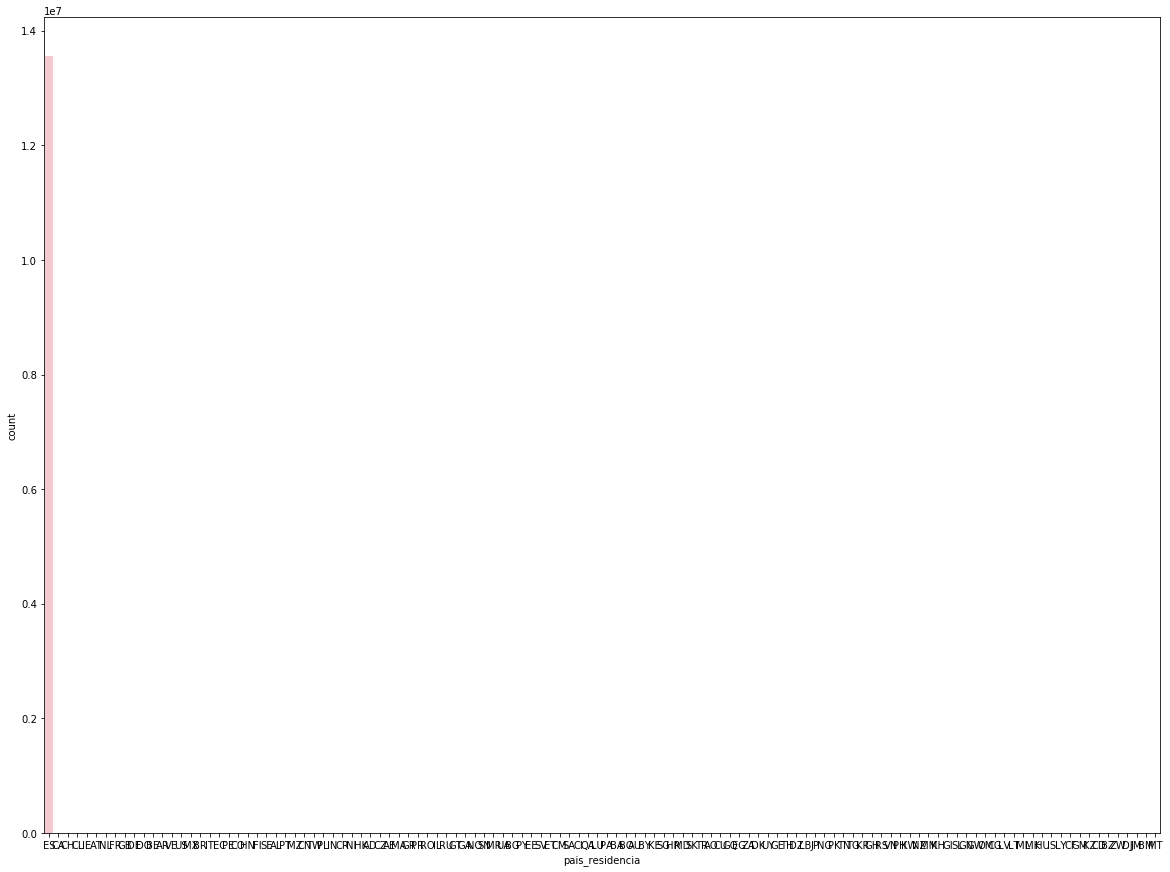

--------------------------------------------------
col:  sexo


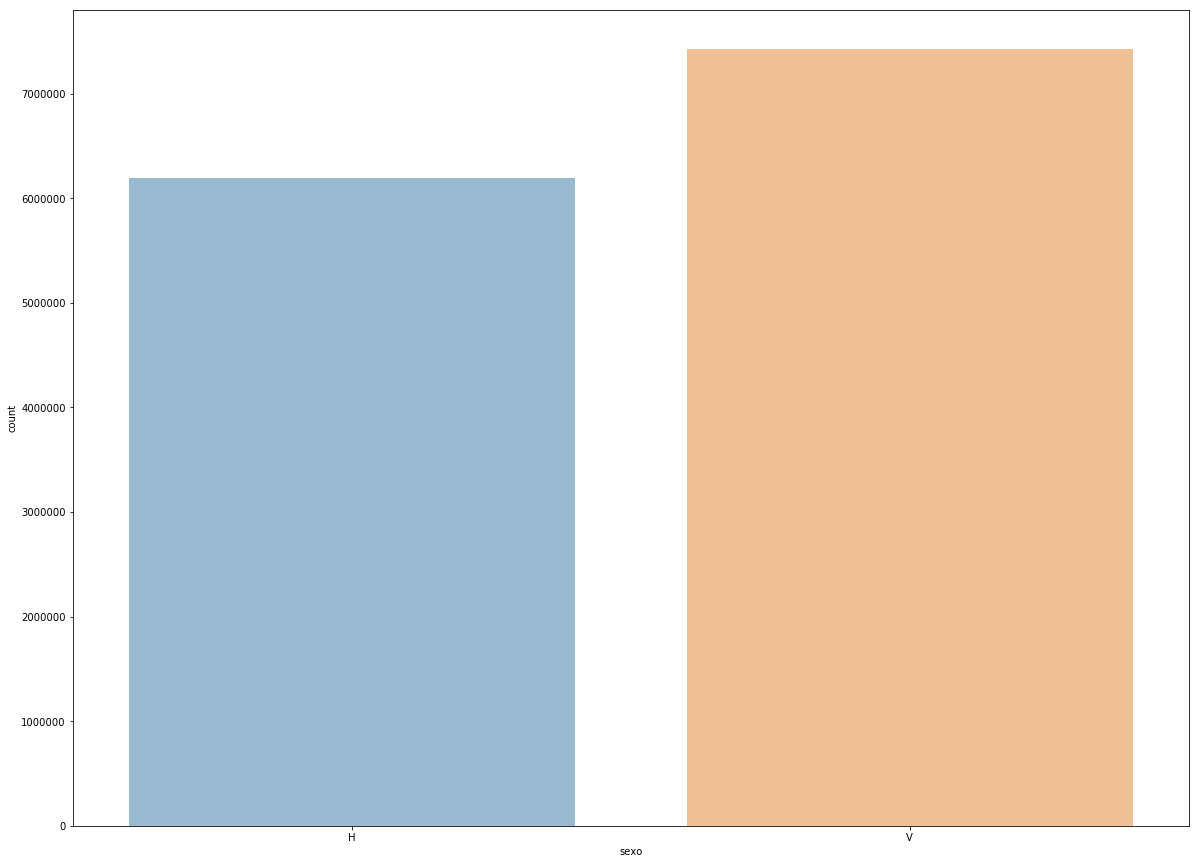

--------------------------------------------------
col:  age


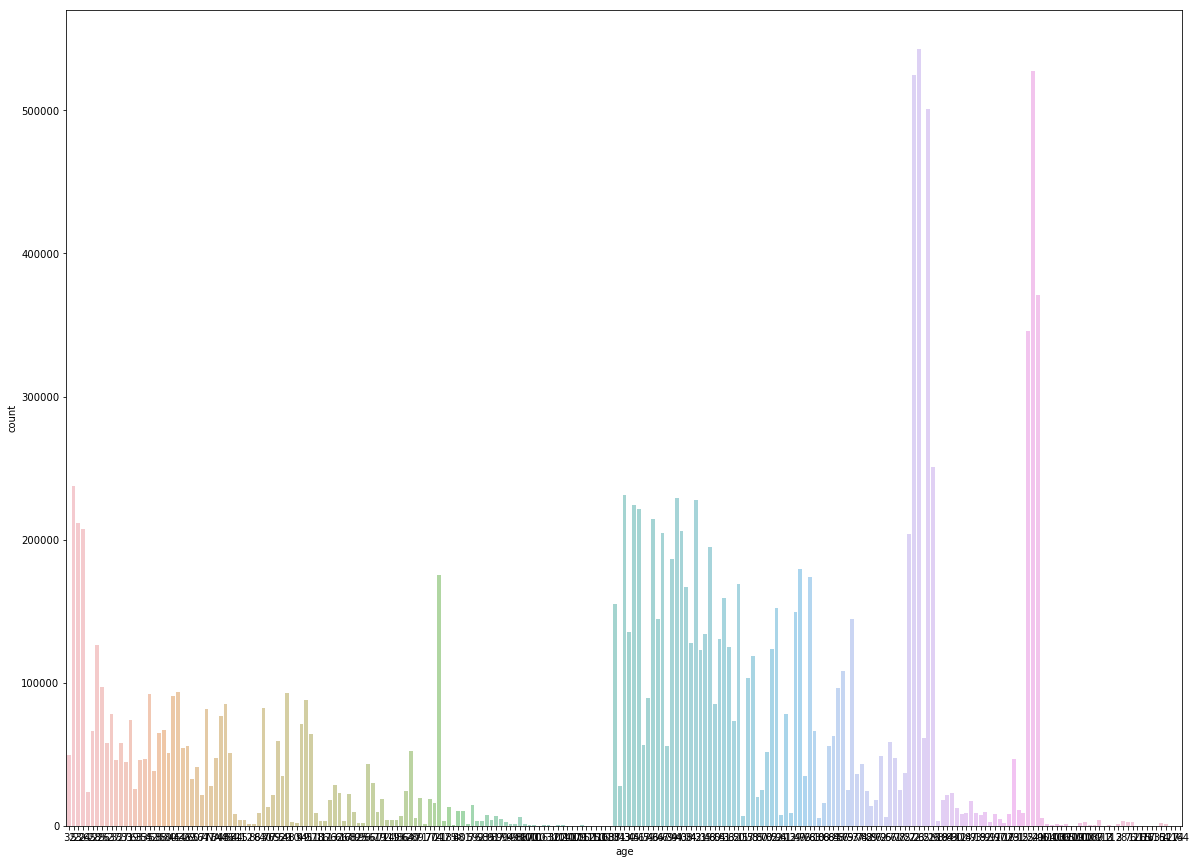

--------------------------------------------------
col:  fecha_alta


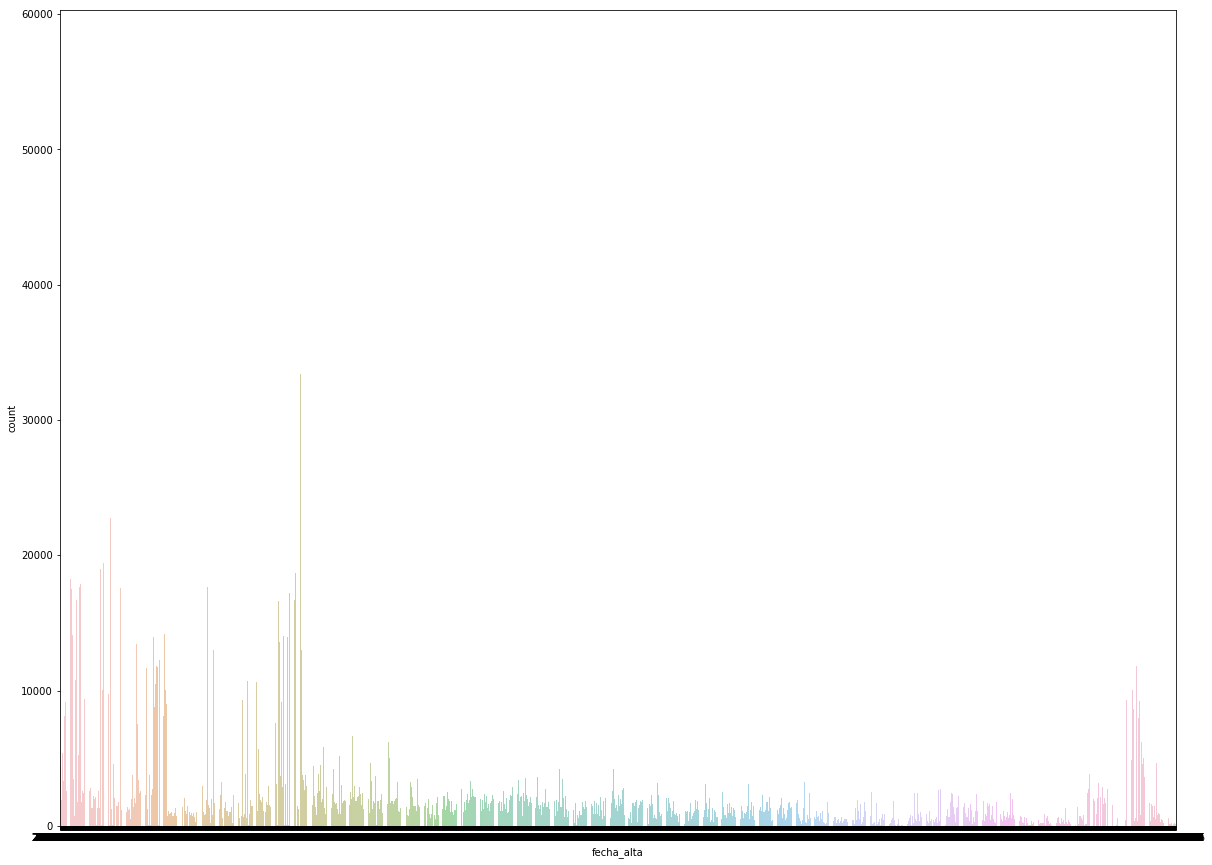

--------------------------------------------------
col:  ind_nuevo


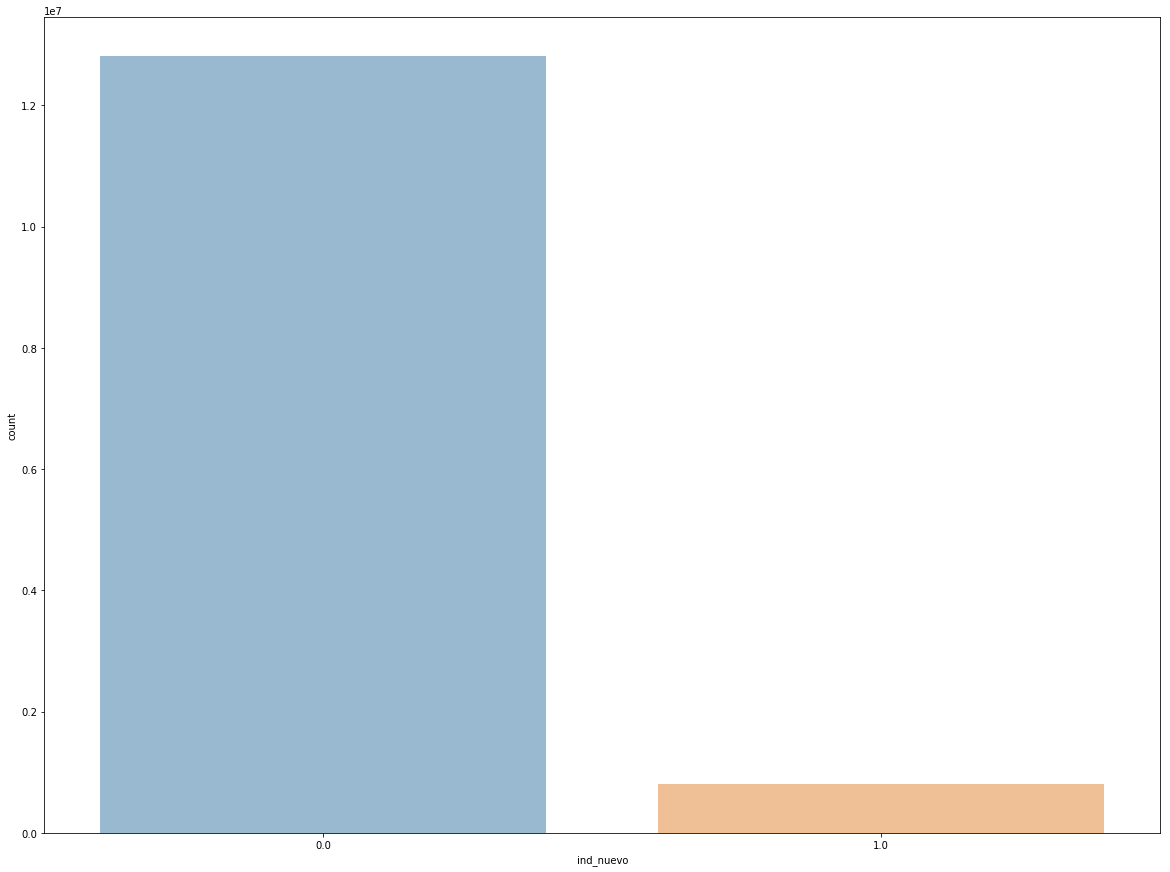

--------------------------------------------------
col:  antiguedad


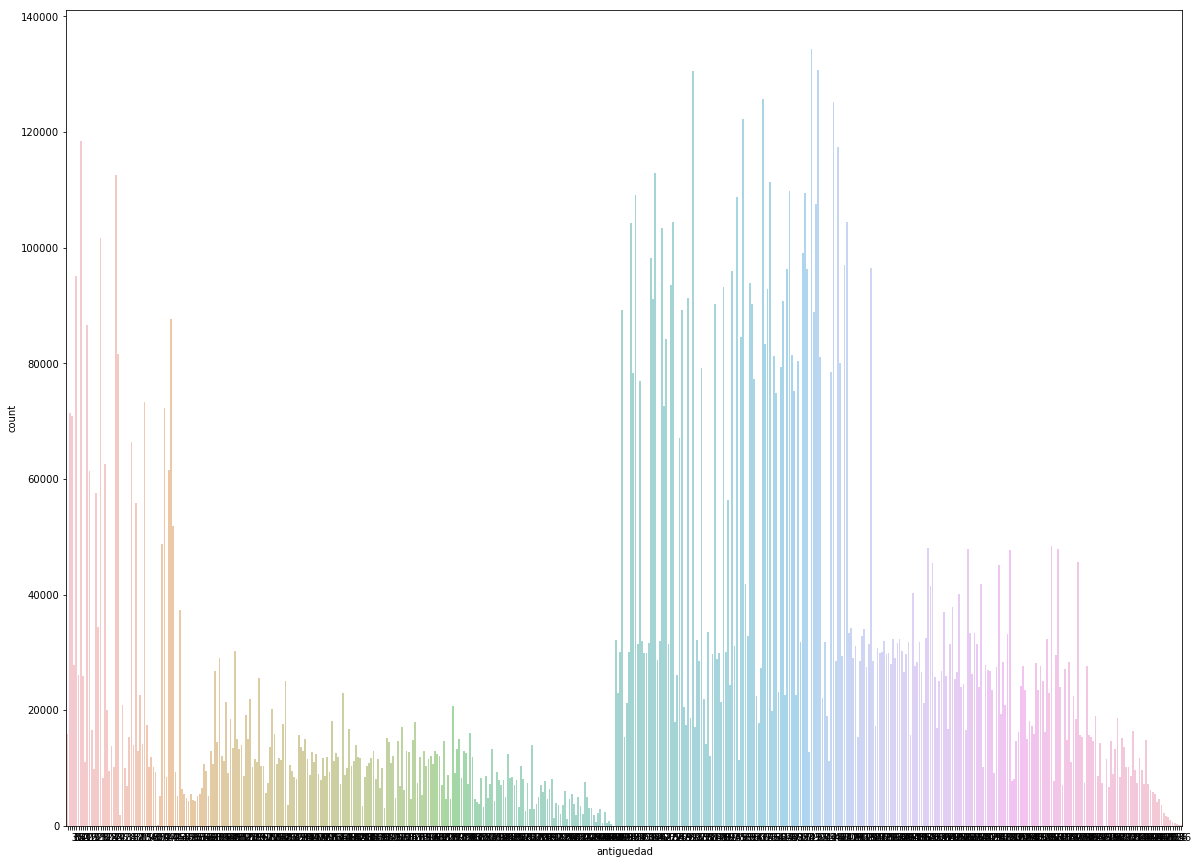

--------------------------------------------------
col:  indrel


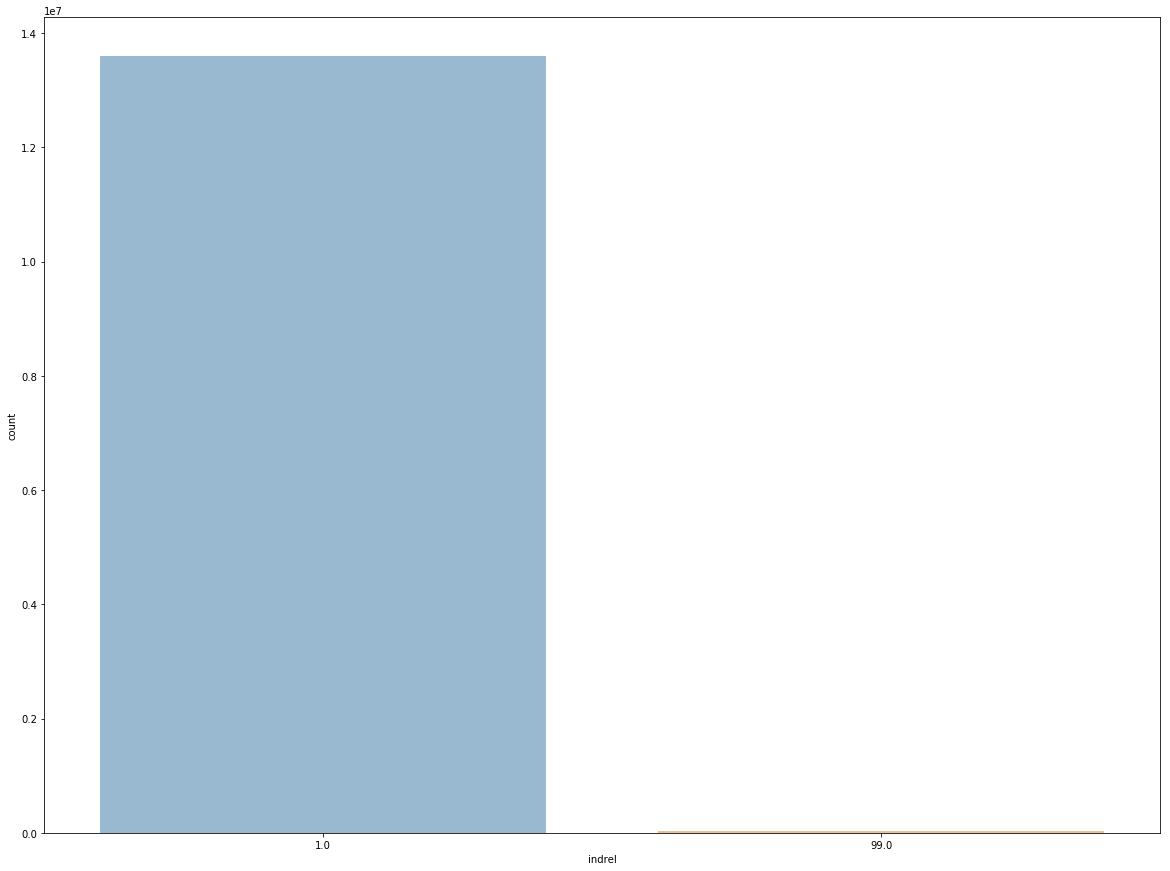

--------------------------------------------------
col:  ult_fec_cli_1t


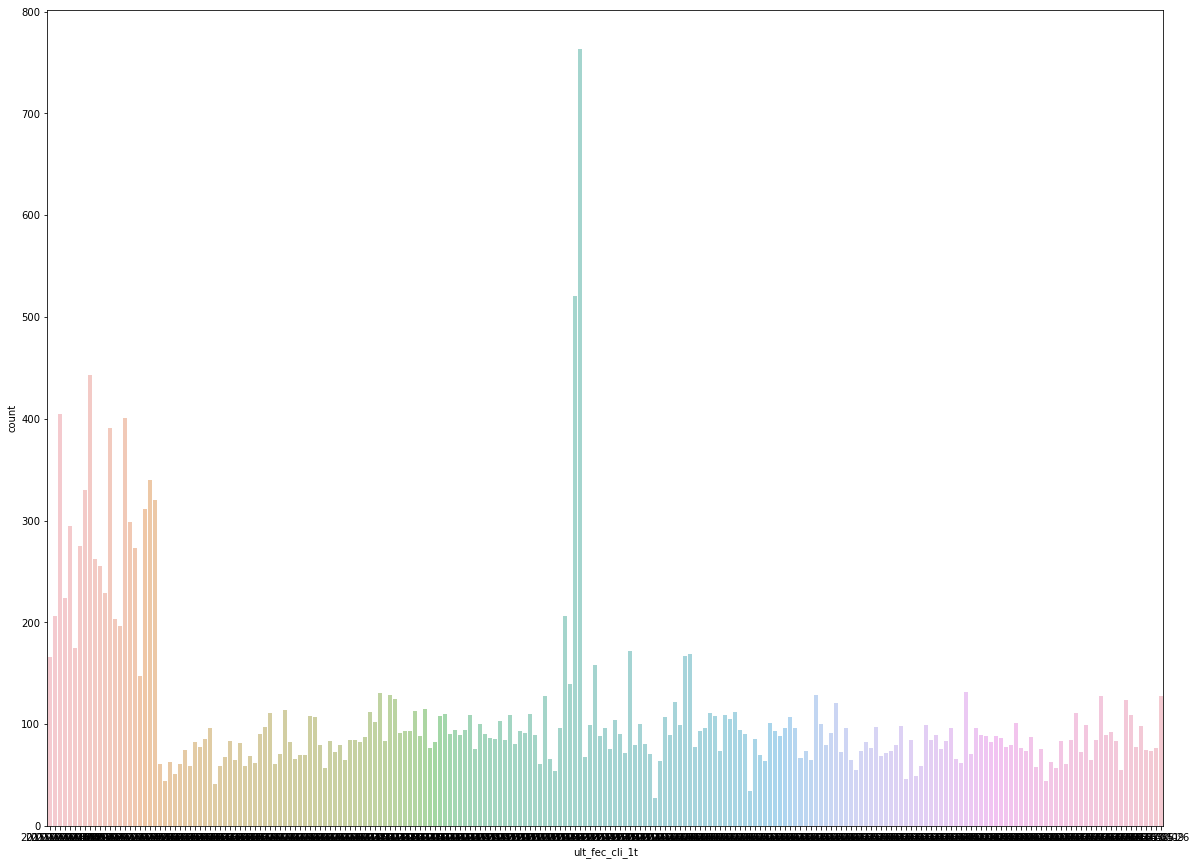

--------------------------------------------------
col:  indrel_1mes


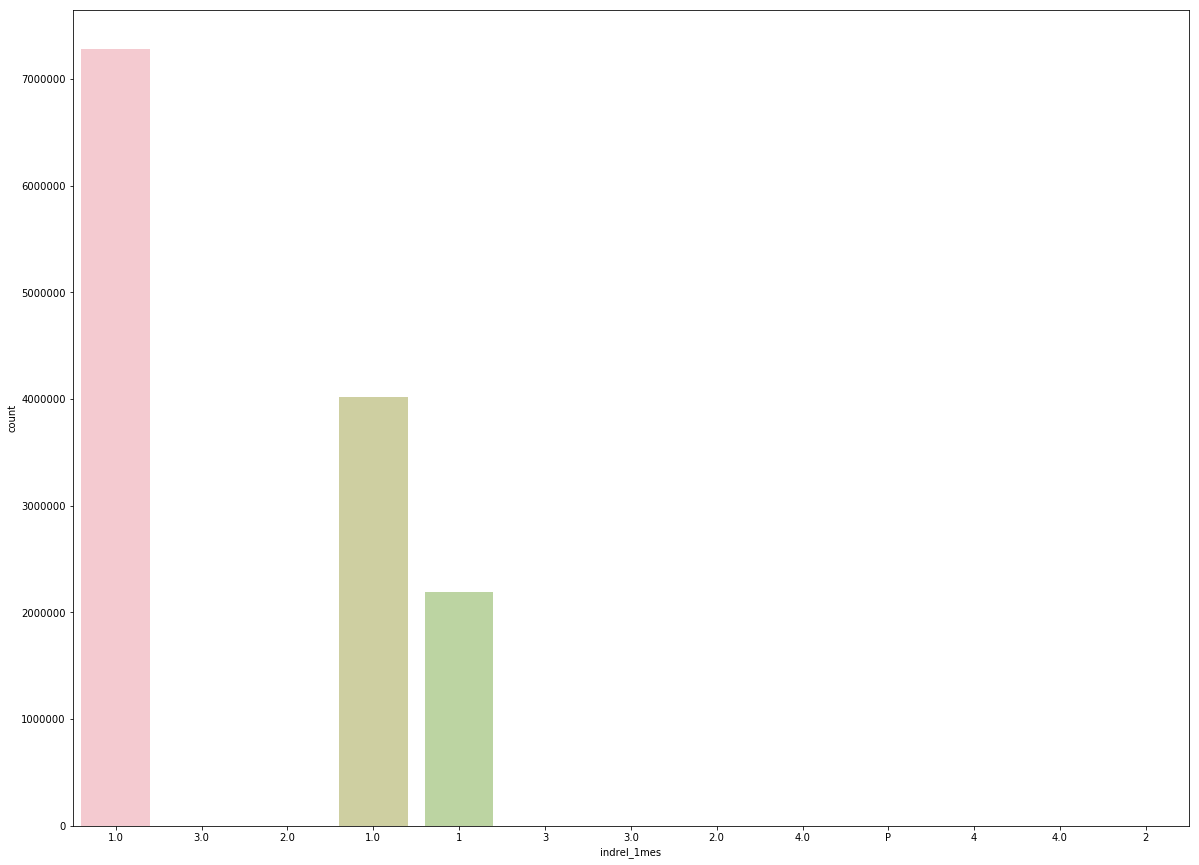

--------------------------------------------------
col:  tiprel_1mes


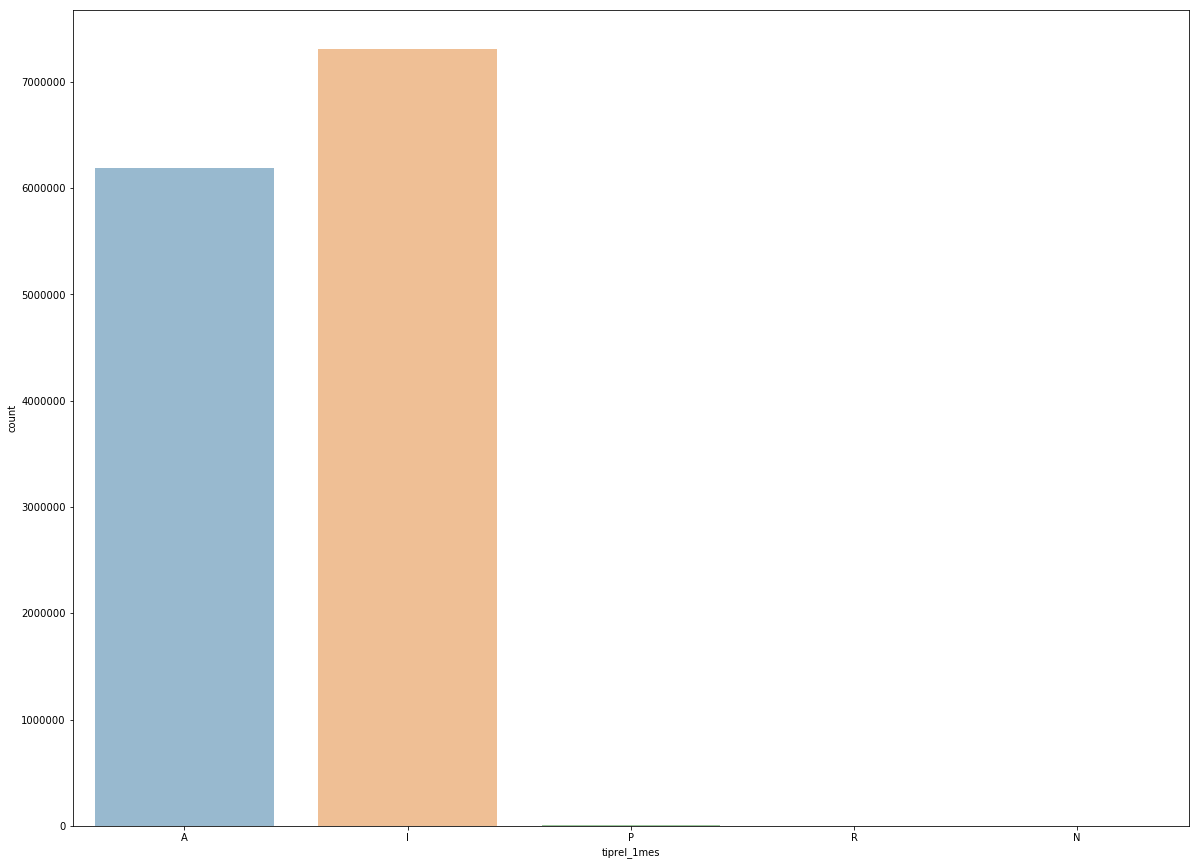

--------------------------------------------------
col:  indresi


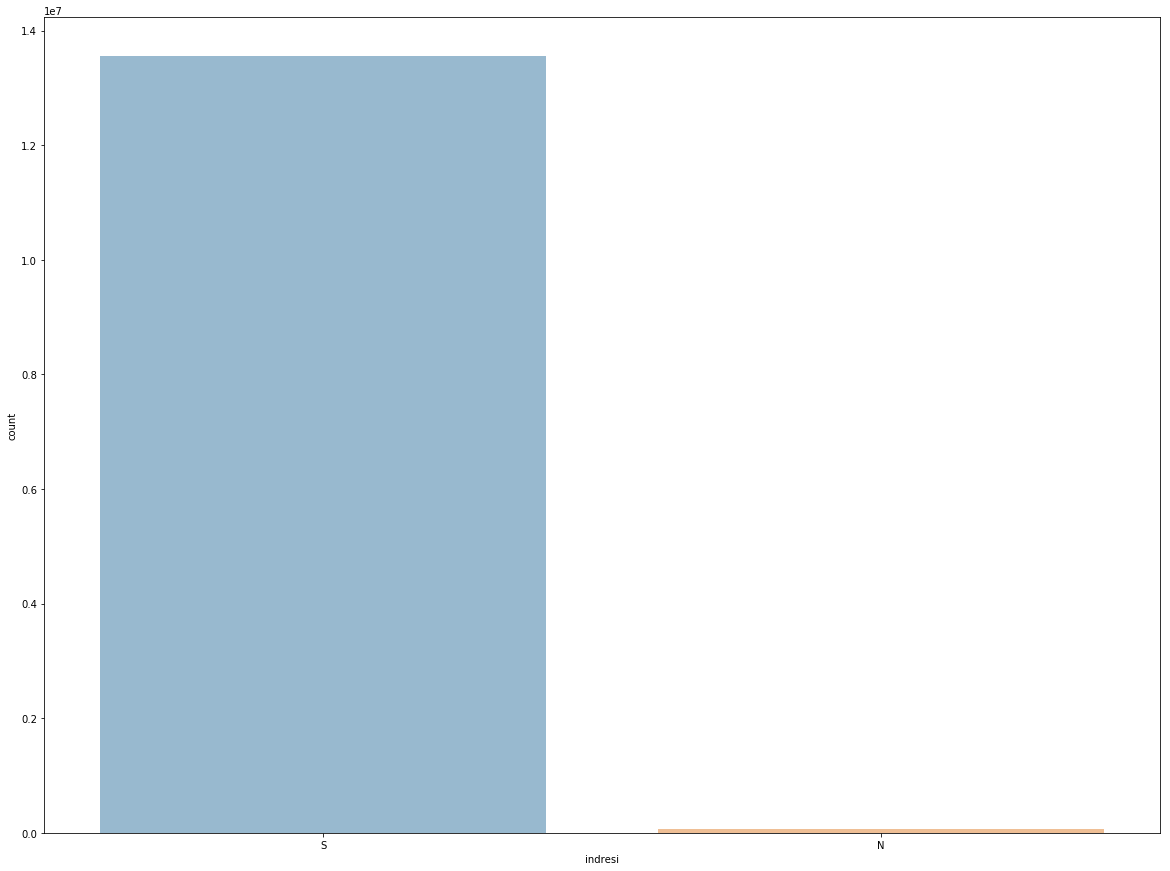

--------------------------------------------------
col:  indext


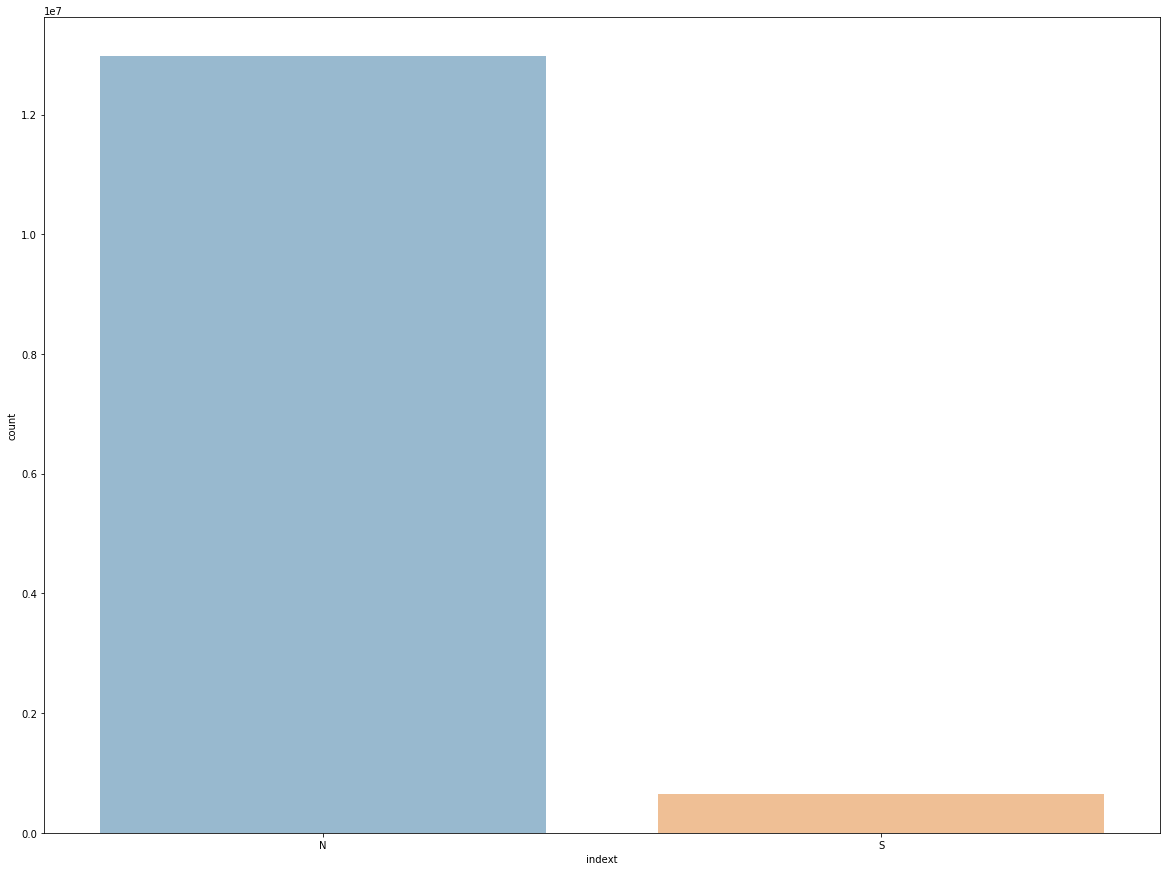

--------------------------------------------------
col:  conyuemp


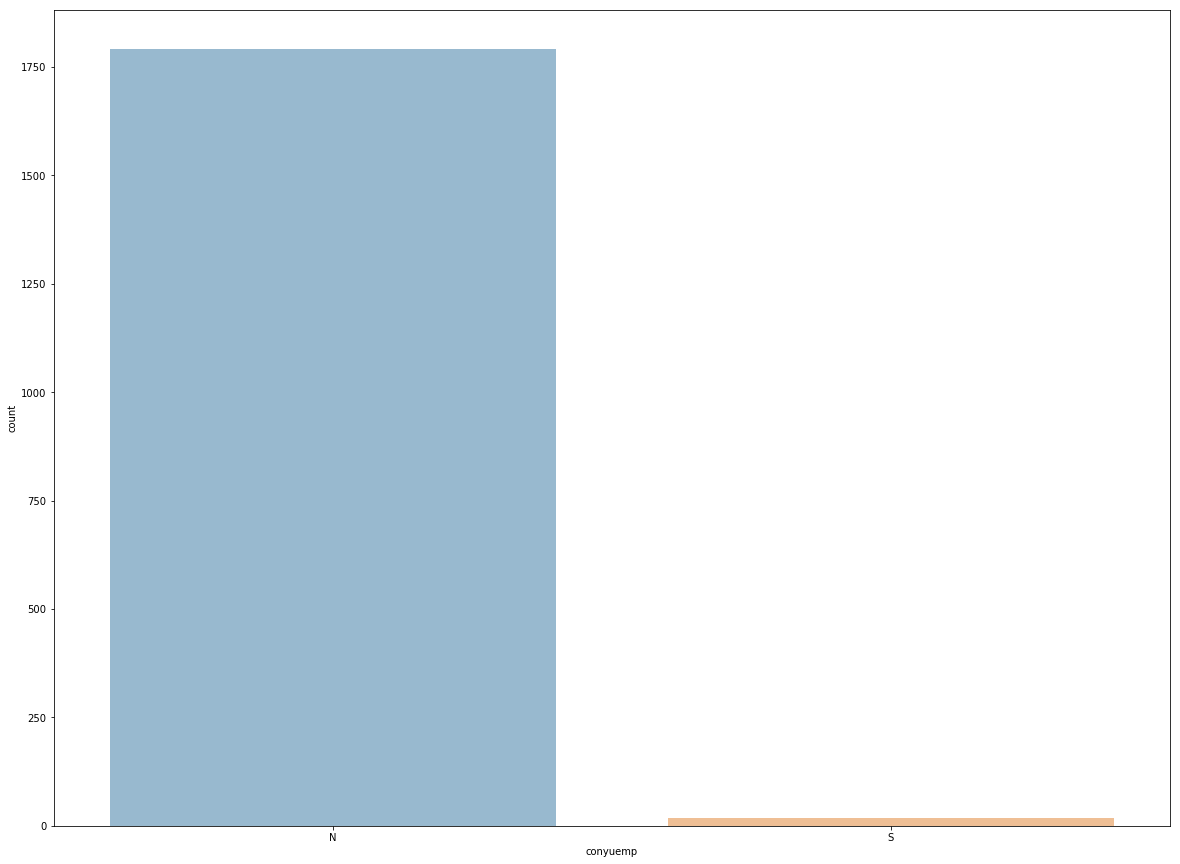

--------------------------------------------------
col:  canal_entrada


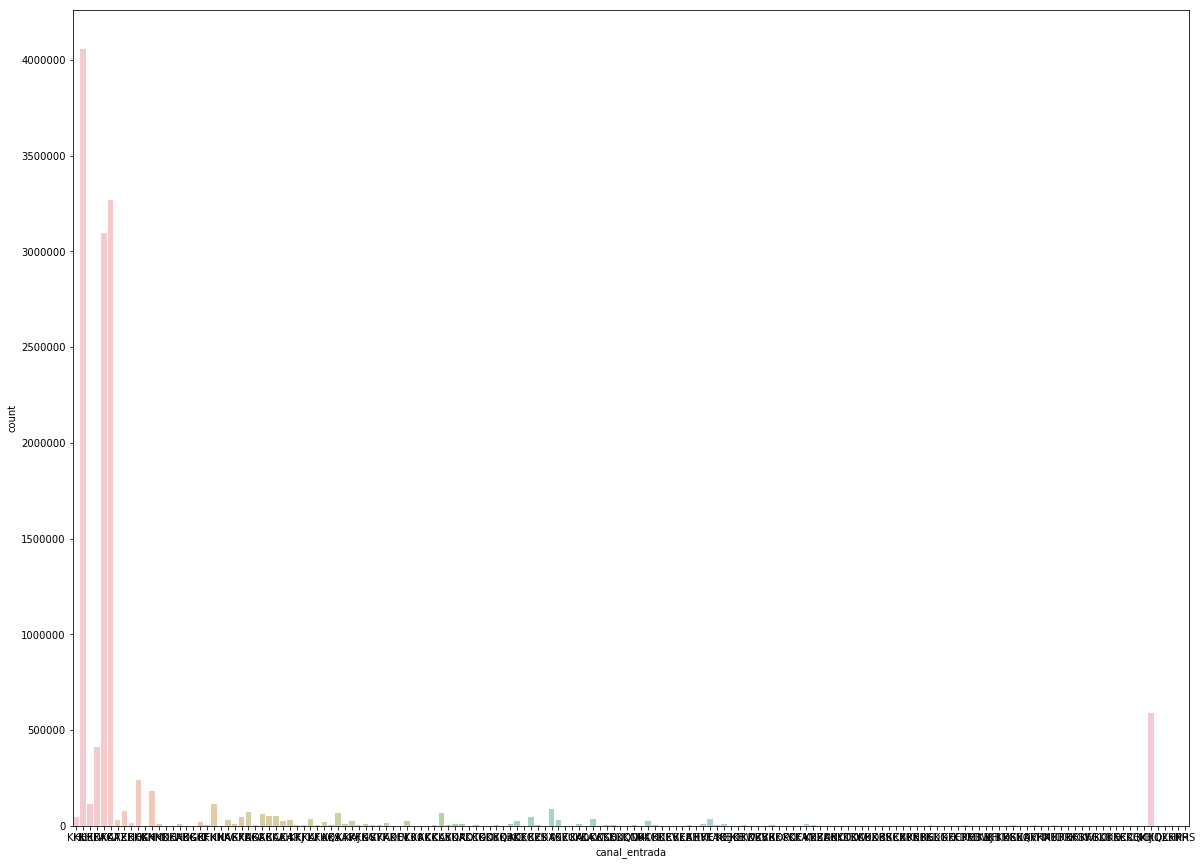

--------------------------------------------------
col:  indfall


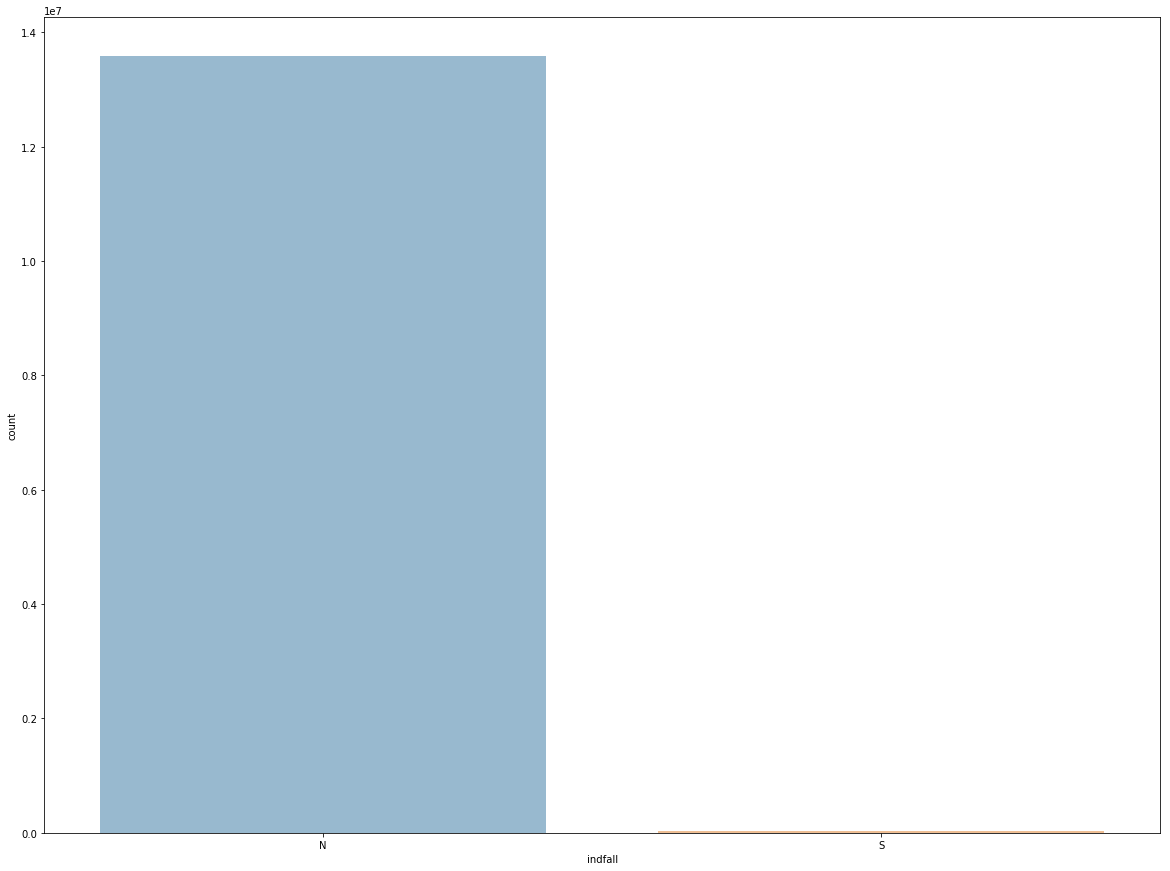

--------------------------------------------------
col:  tipodom


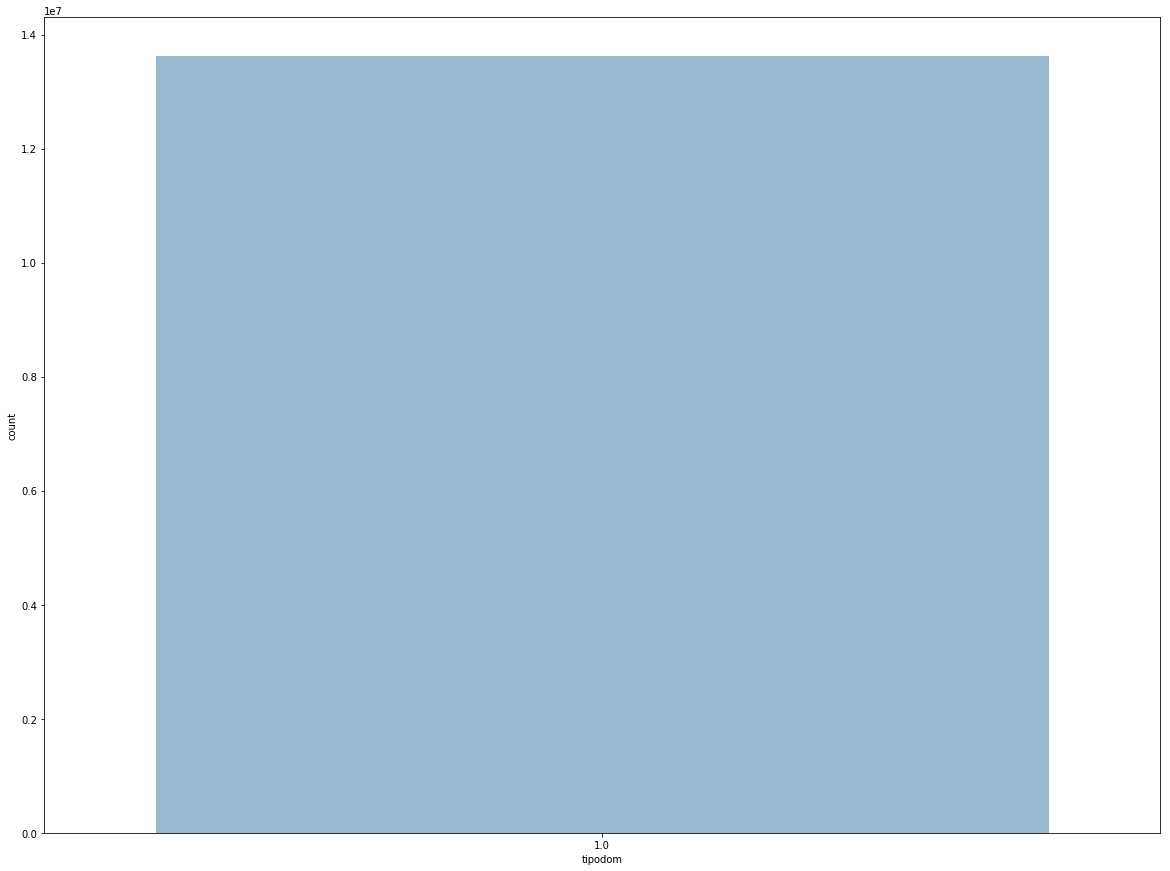

--------------------------------------------------
col:  cod_prov


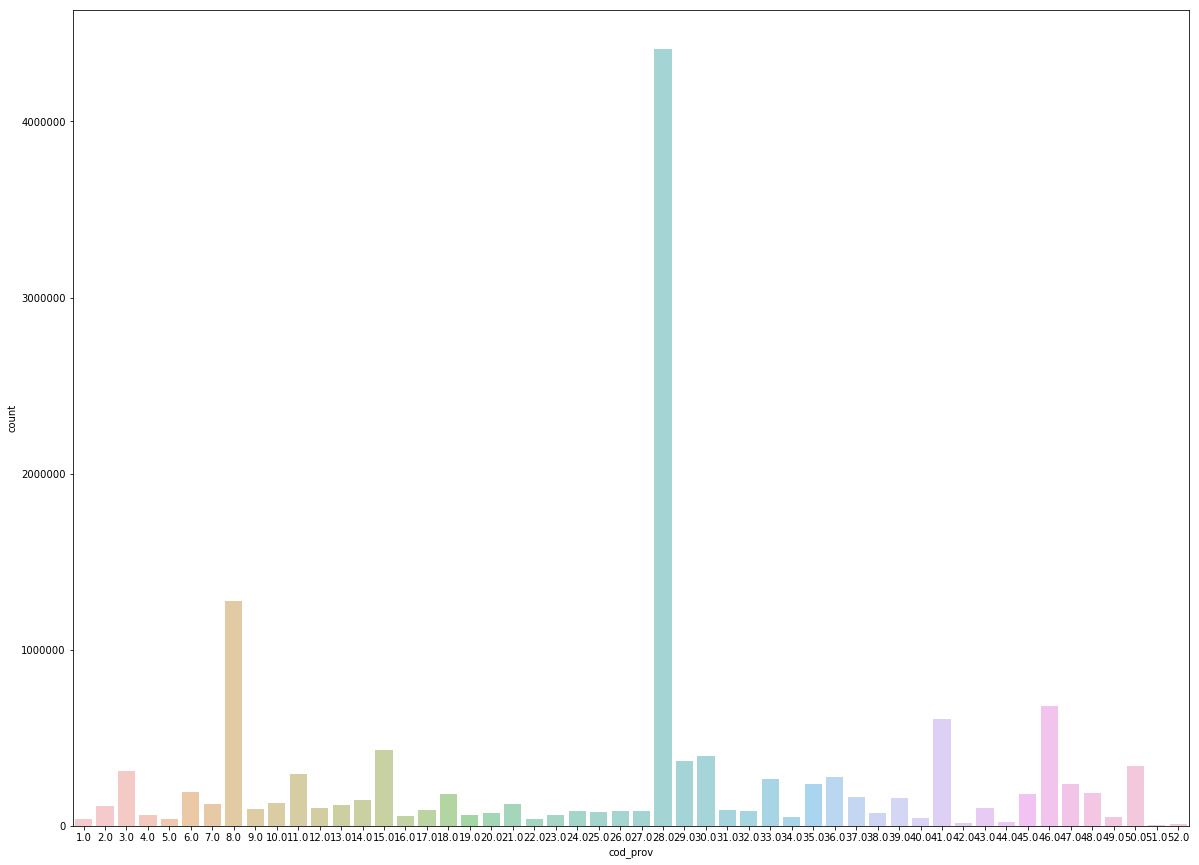

--------------------------------------------------
col:  nomprov


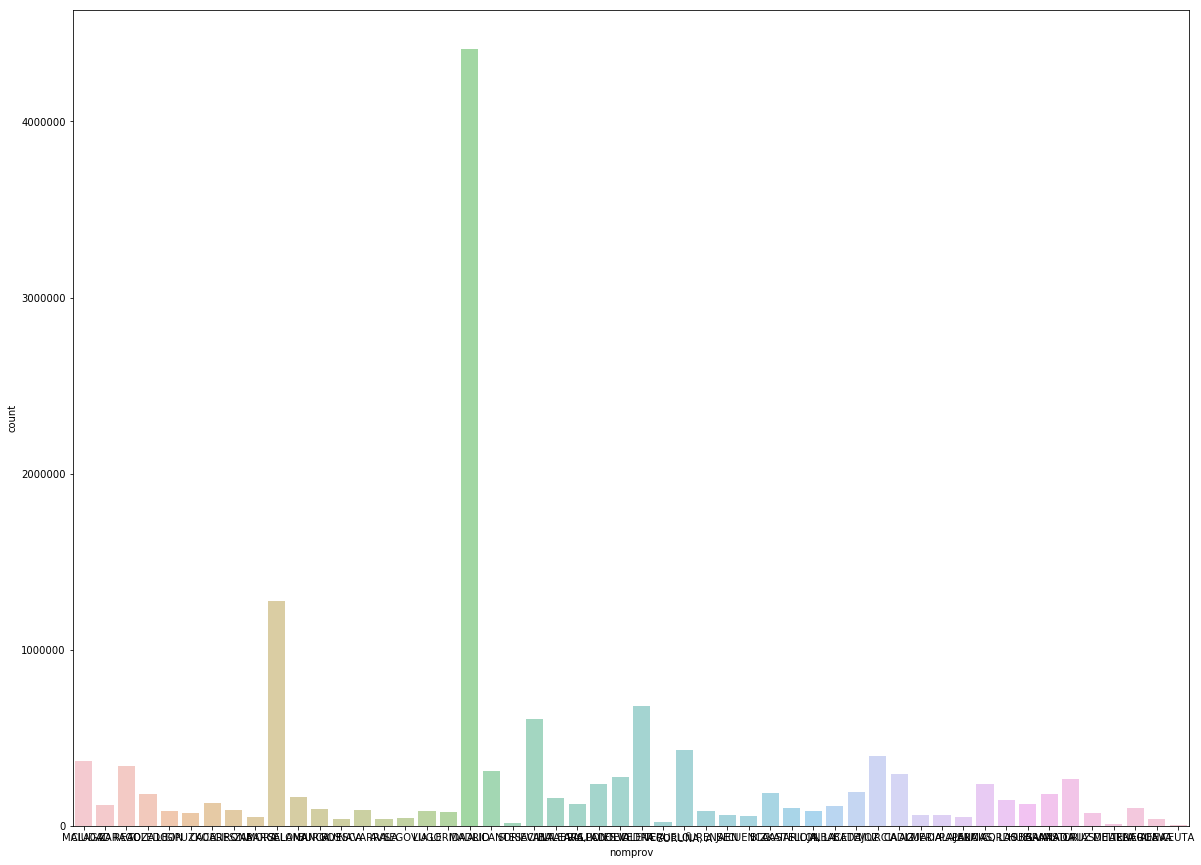

--------------------------------------------------
col:  ind_actividad_cliente


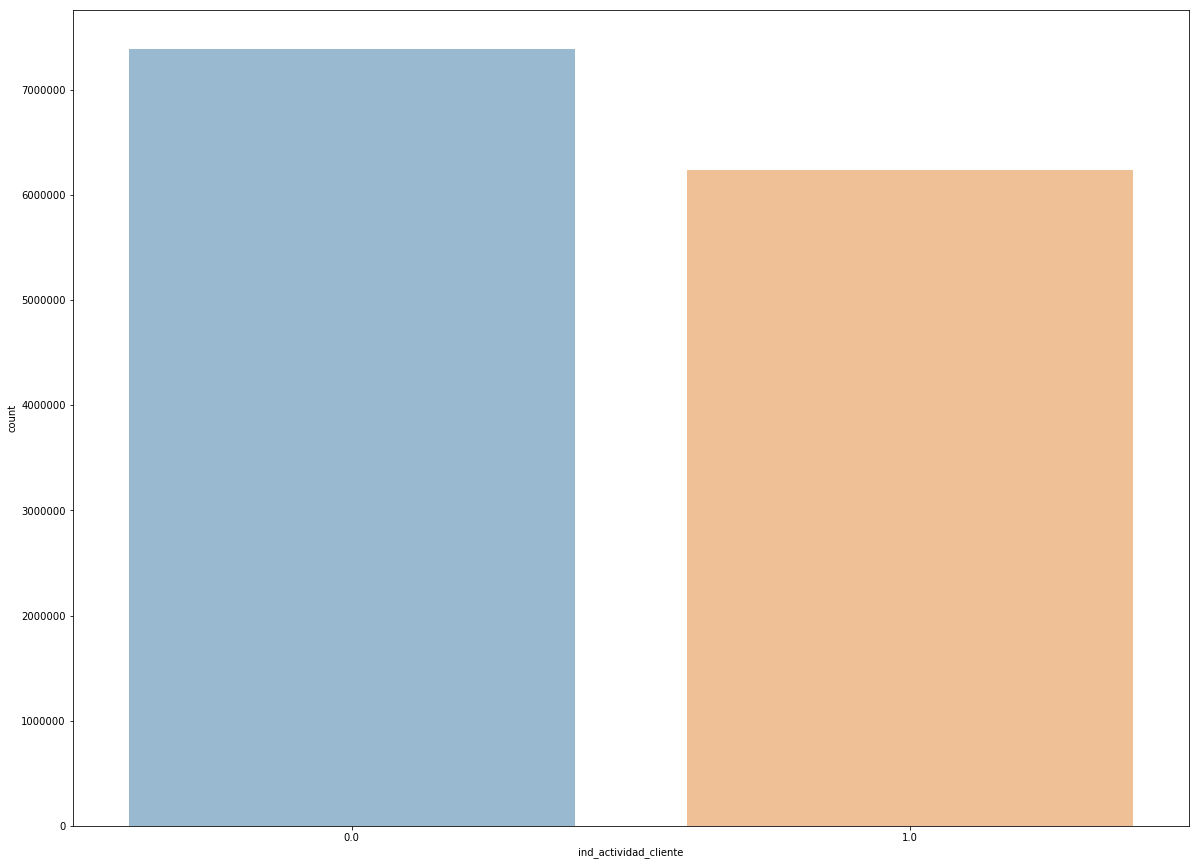

--------------------------------------------------
col:  segmento


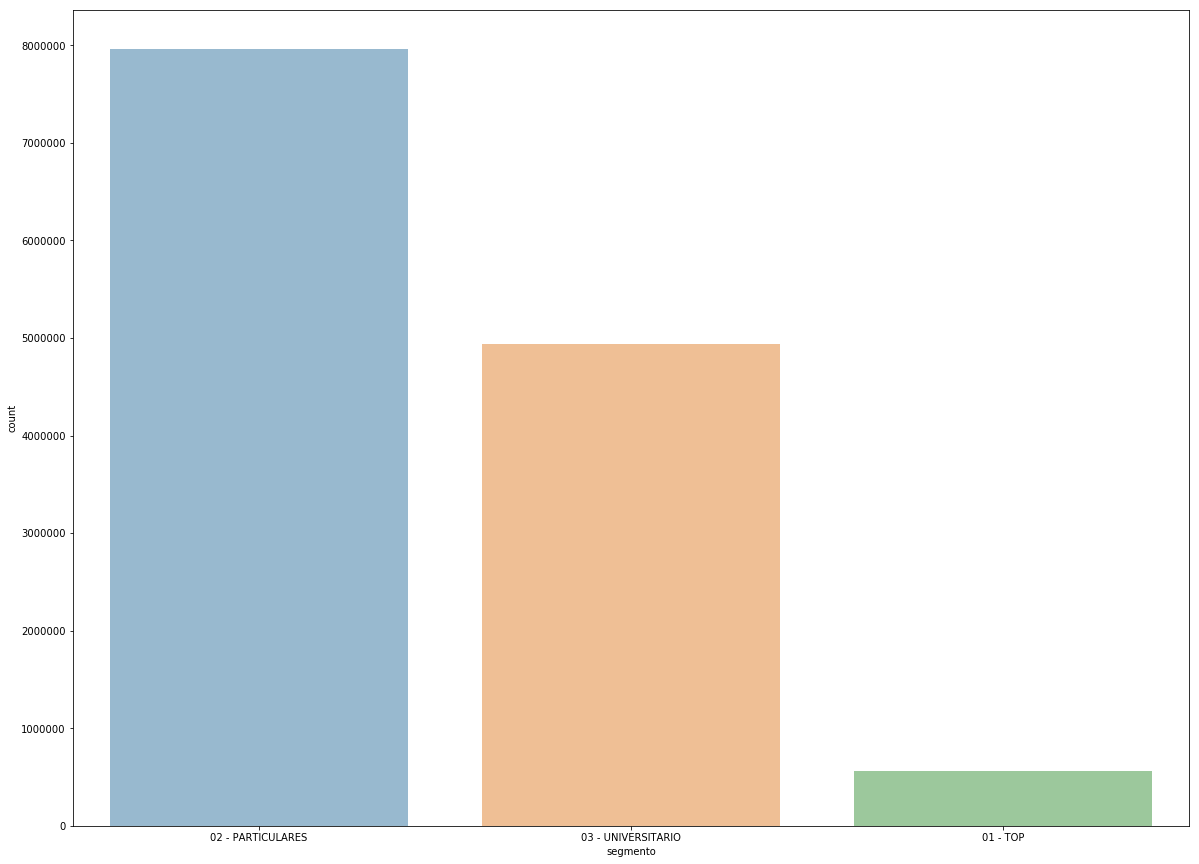

--------------------------------------------------
col:  ind_ahor_fin_ult1


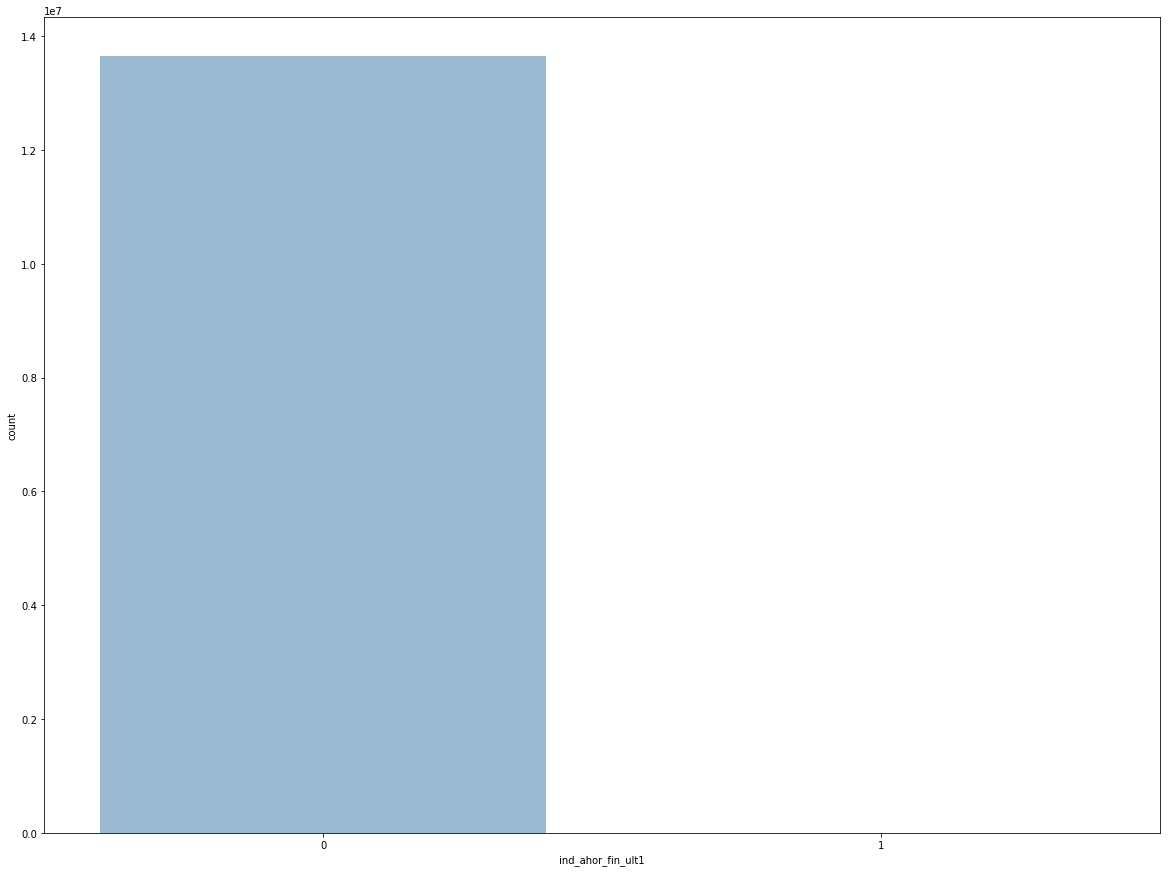

--------------------------------------------------
col:  ind_aval_fin_ult1


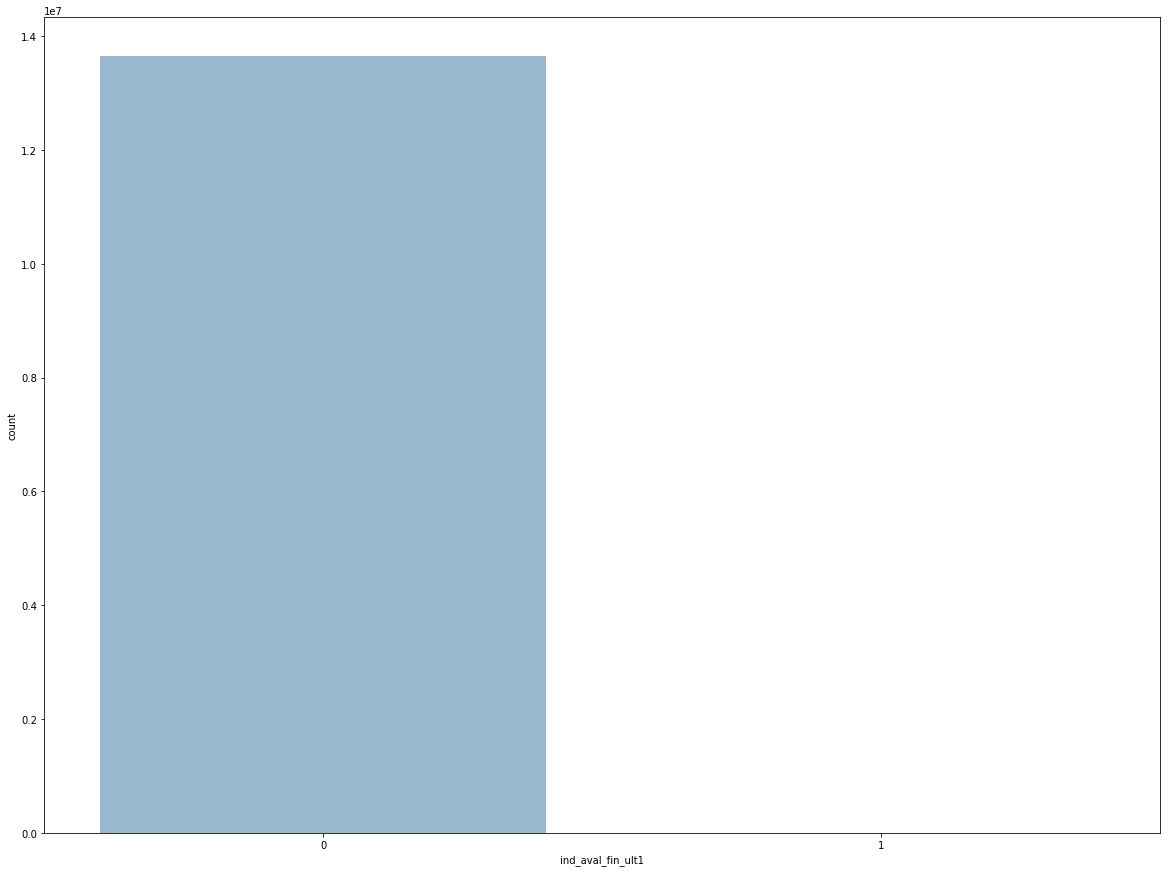

--------------------------------------------------
col:  ind_cco_fin_ult1


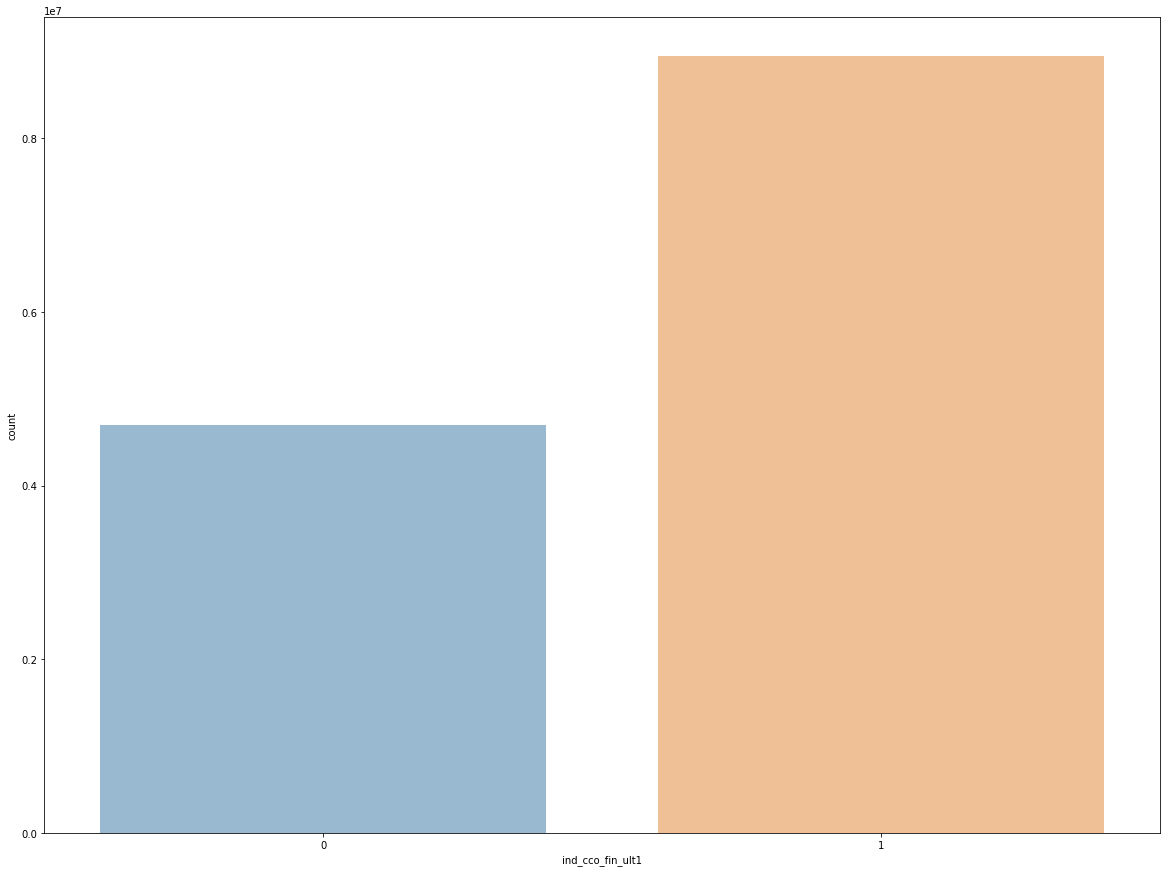

--------------------------------------------------
col:  ind_cder_fin_ult1


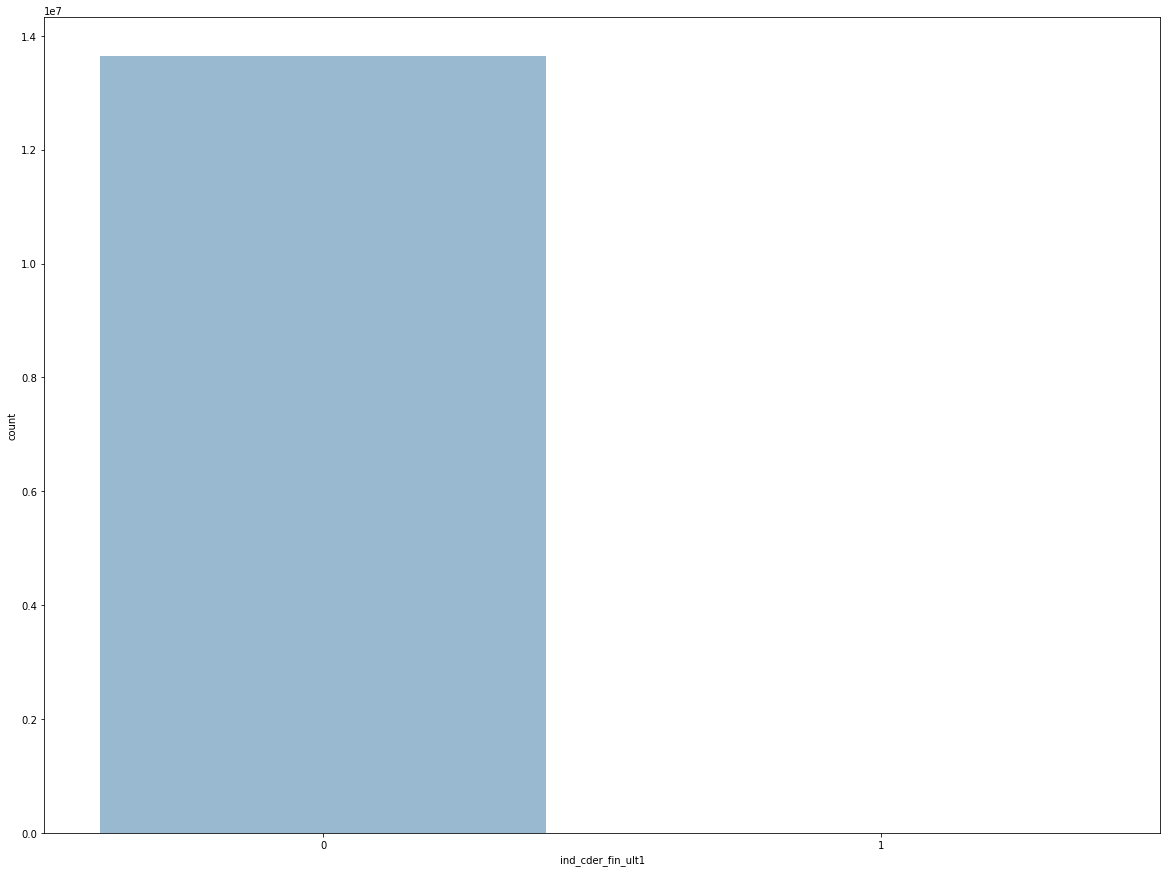

--------------------------------------------------
col:  ind_cno_fin_ult1


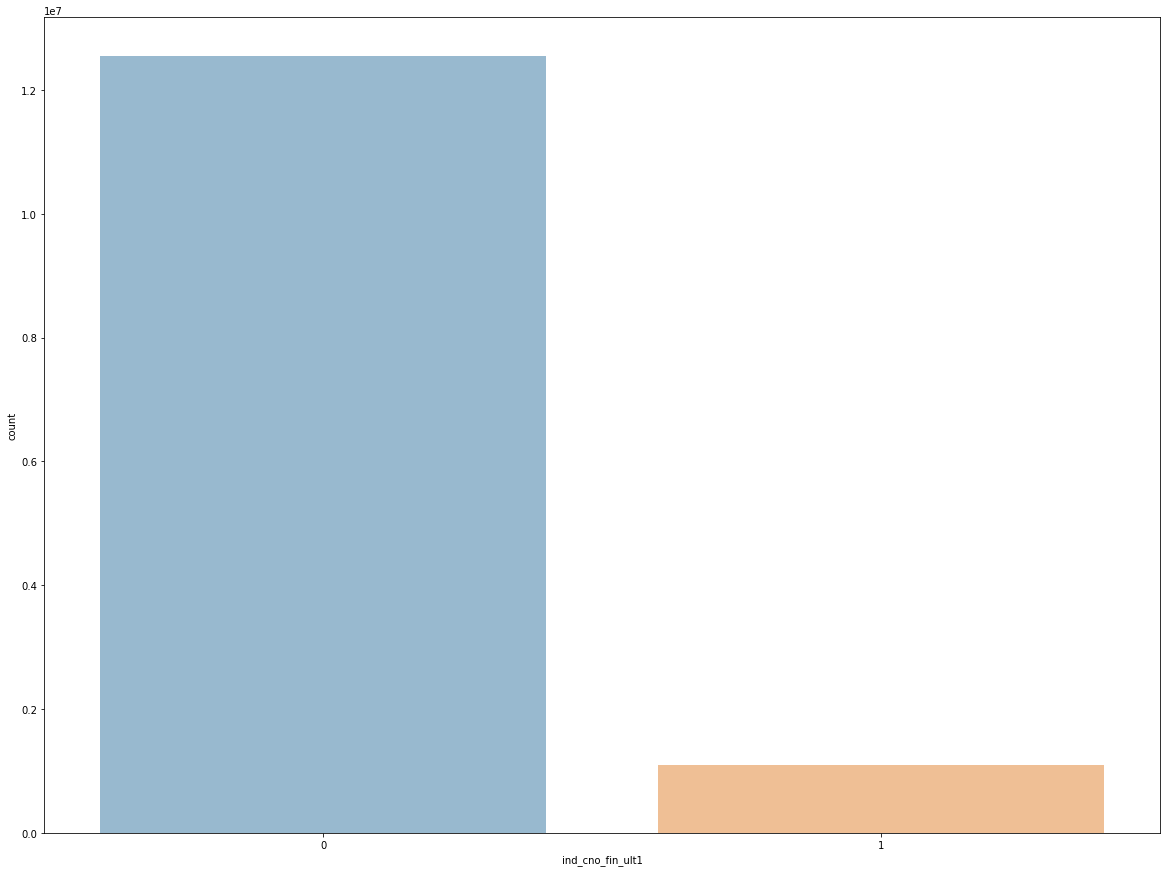

--------------------------------------------------
col:  ind_ctju_fin_ult1


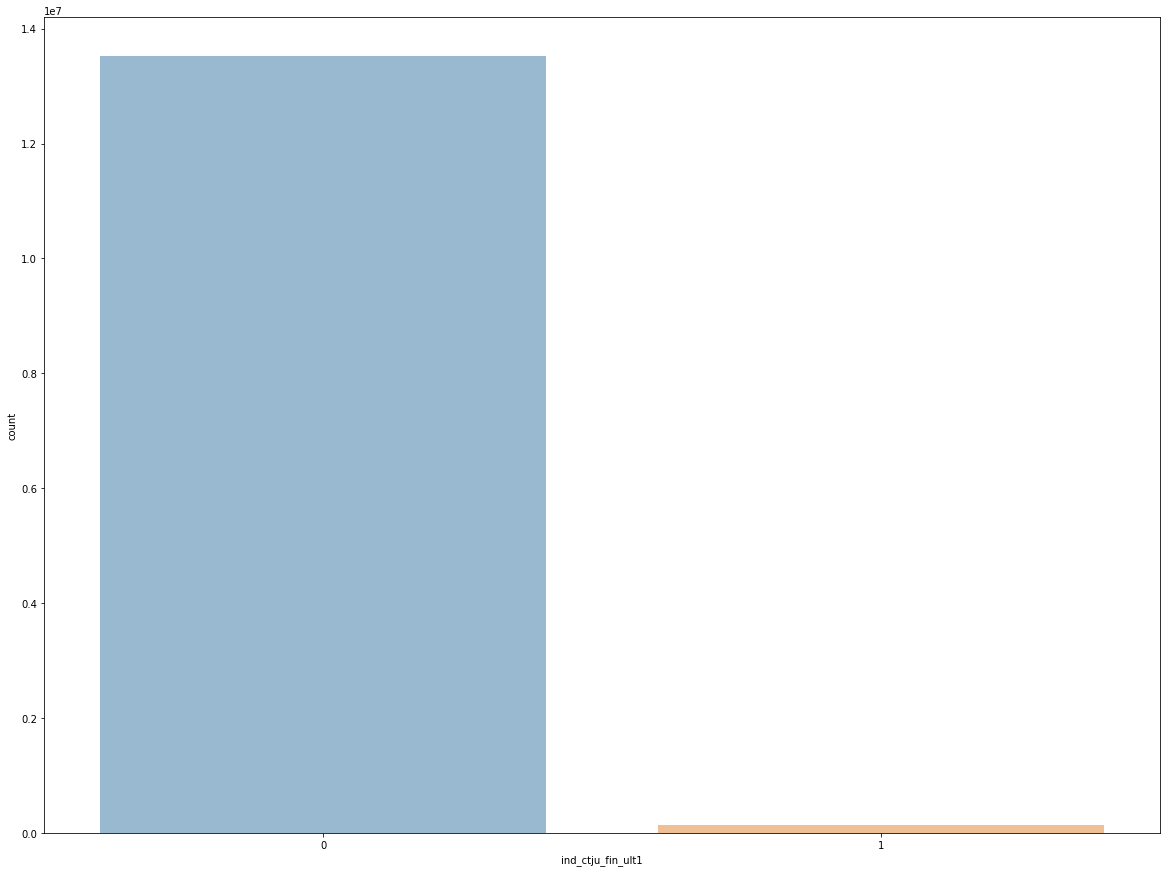

--------------------------------------------------
col:  ind_ctma_fin_ult1


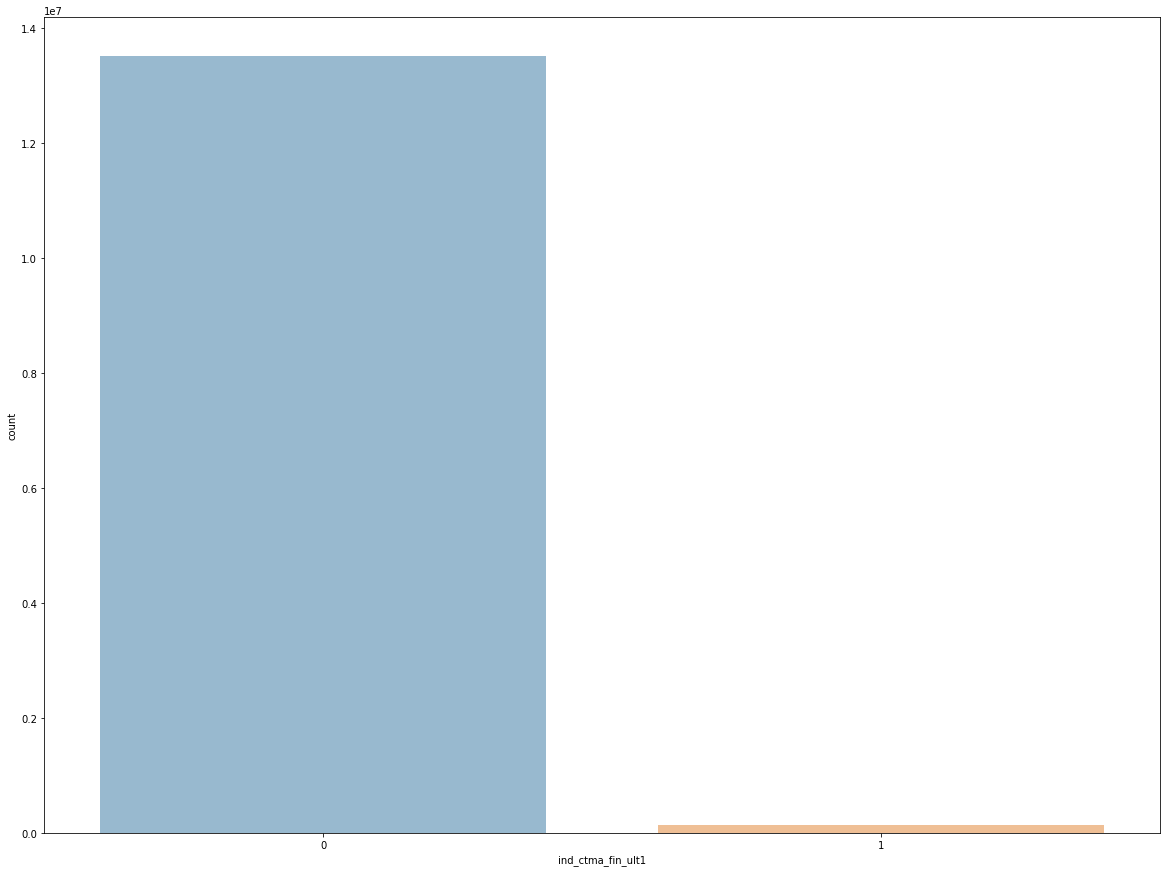

--------------------------------------------------
col:  ind_ctop_fin_ult1


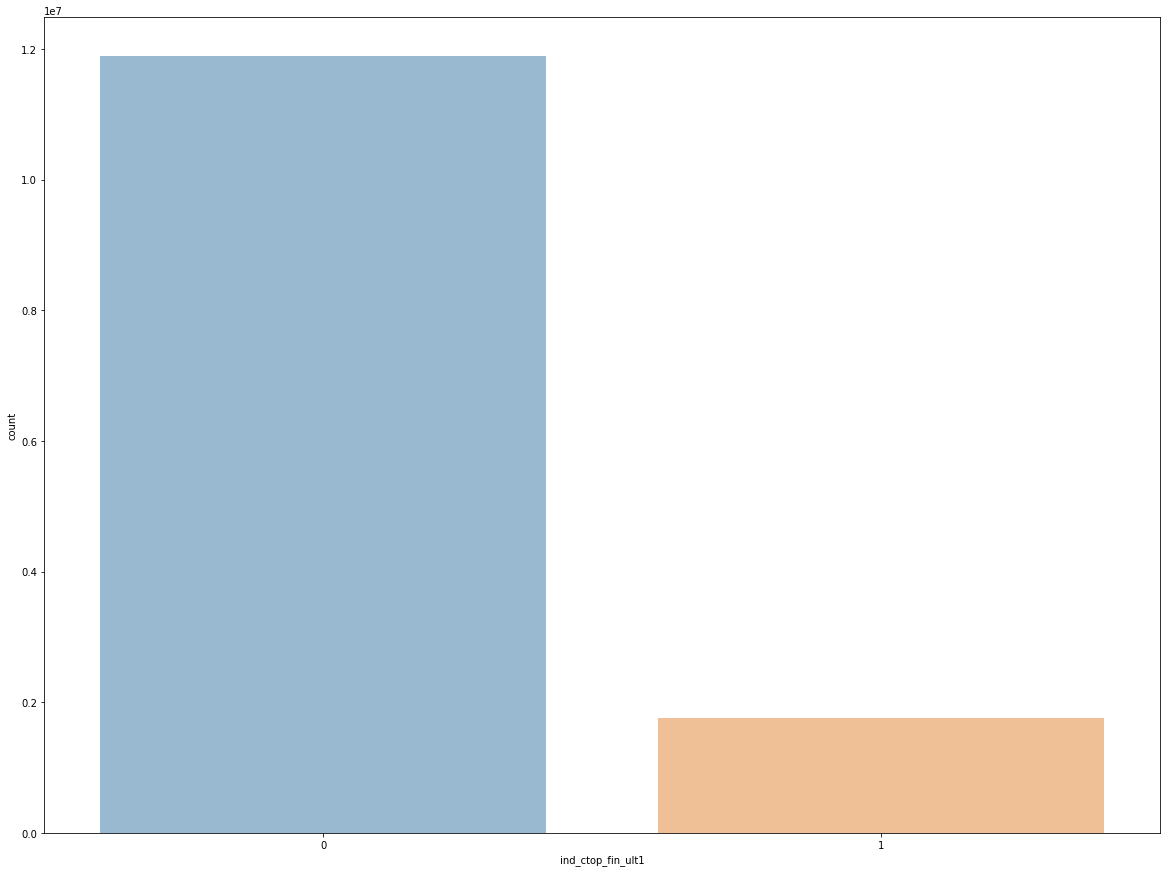

--------------------------------------------------
col:  ind_ctpp_fin_ult1


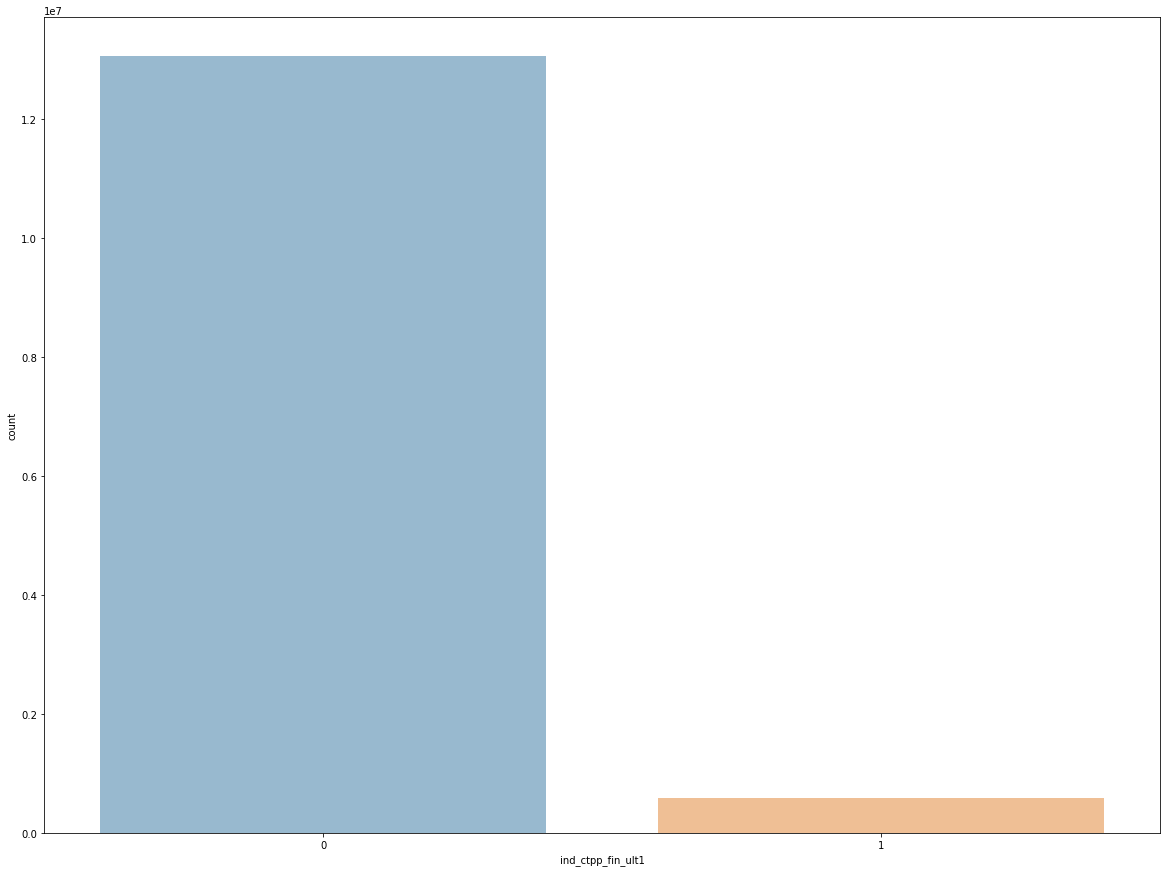

--------------------------------------------------
col:  ind_deco_fin_ult1


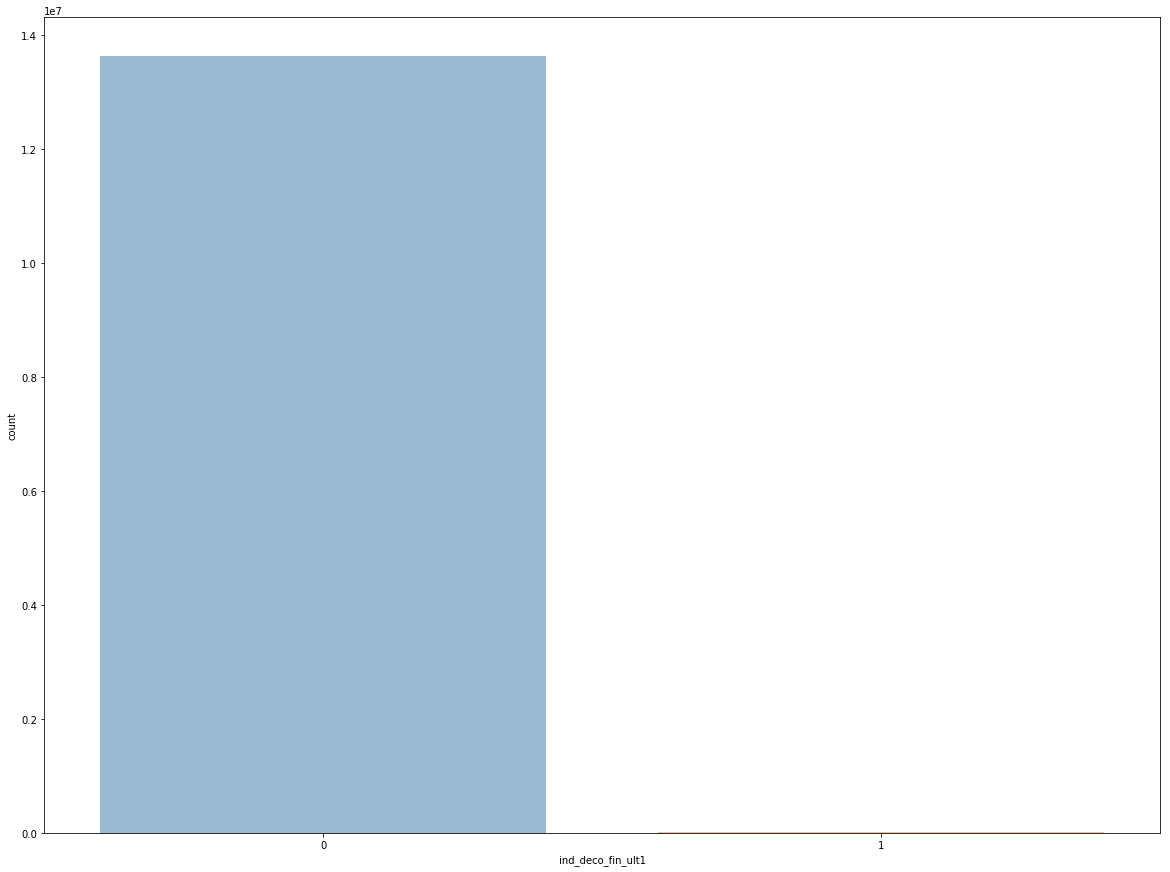

--------------------------------------------------
col:  ind_deme_fin_ult1


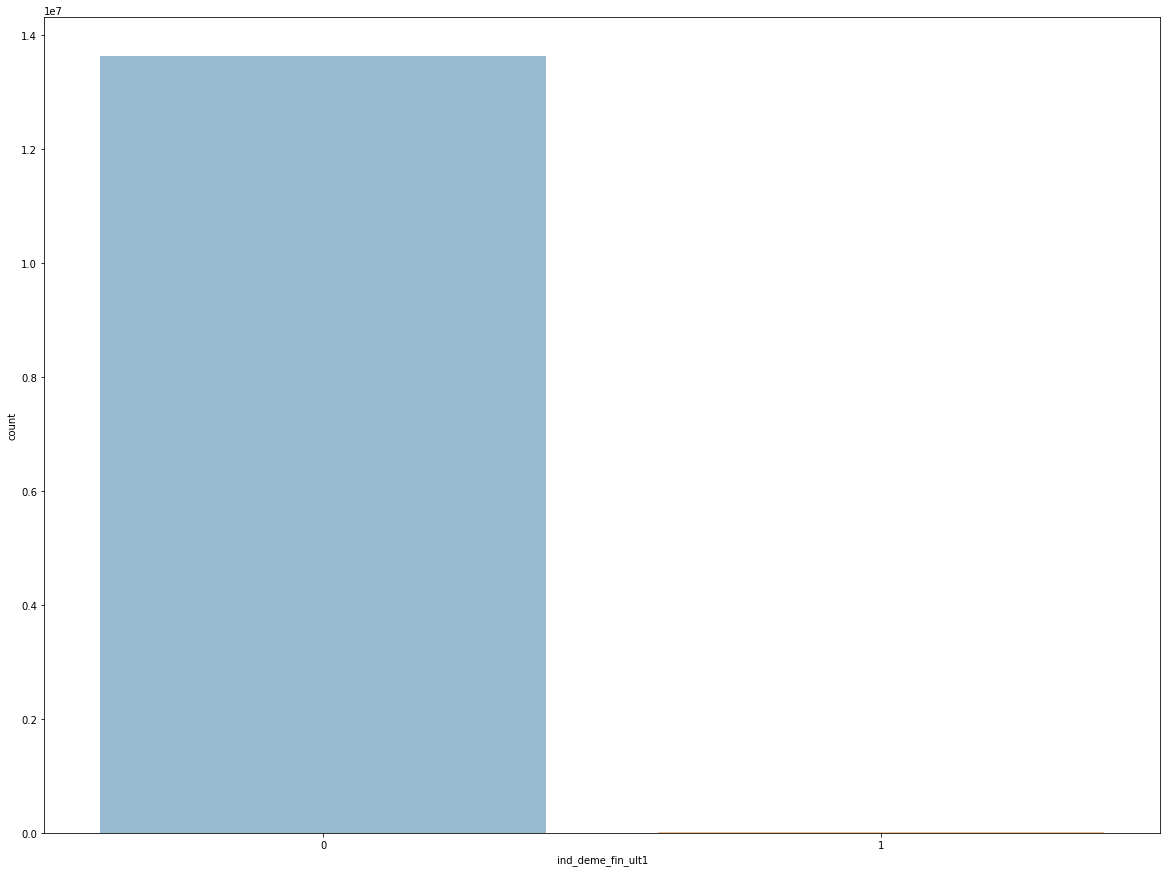

--------------------------------------------------
col:  ind_dela_fin_ult1


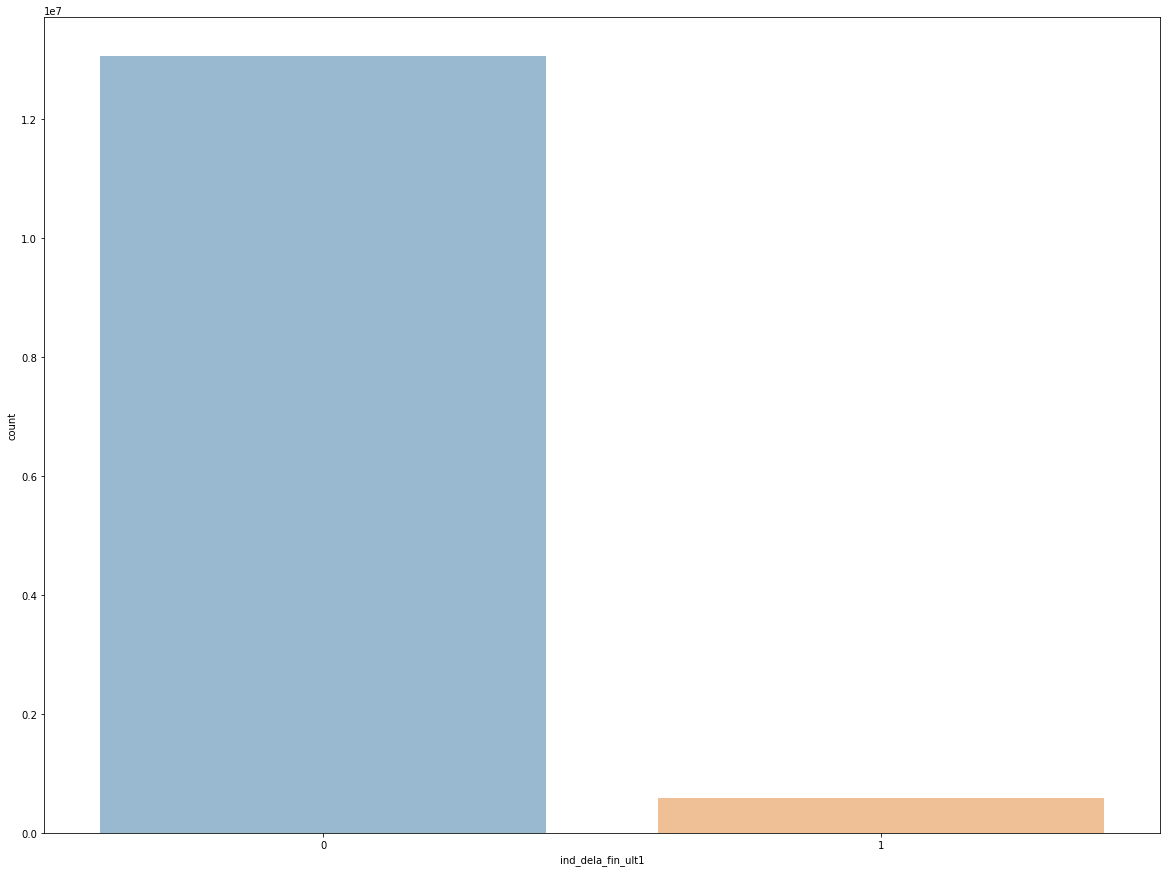

--------------------------------------------------
col:  ind_ecue_fin_ult1


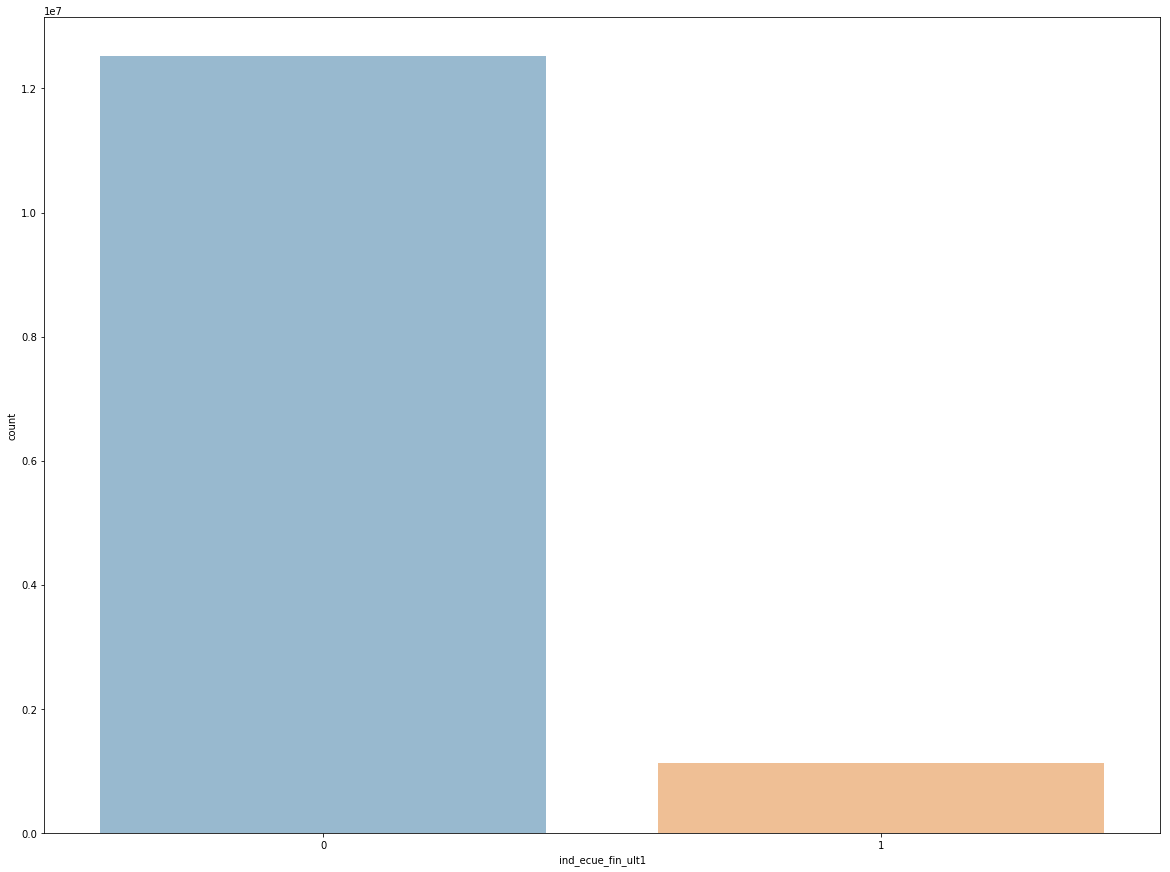

--------------------------------------------------
col:  ind_fond_fin_ult1


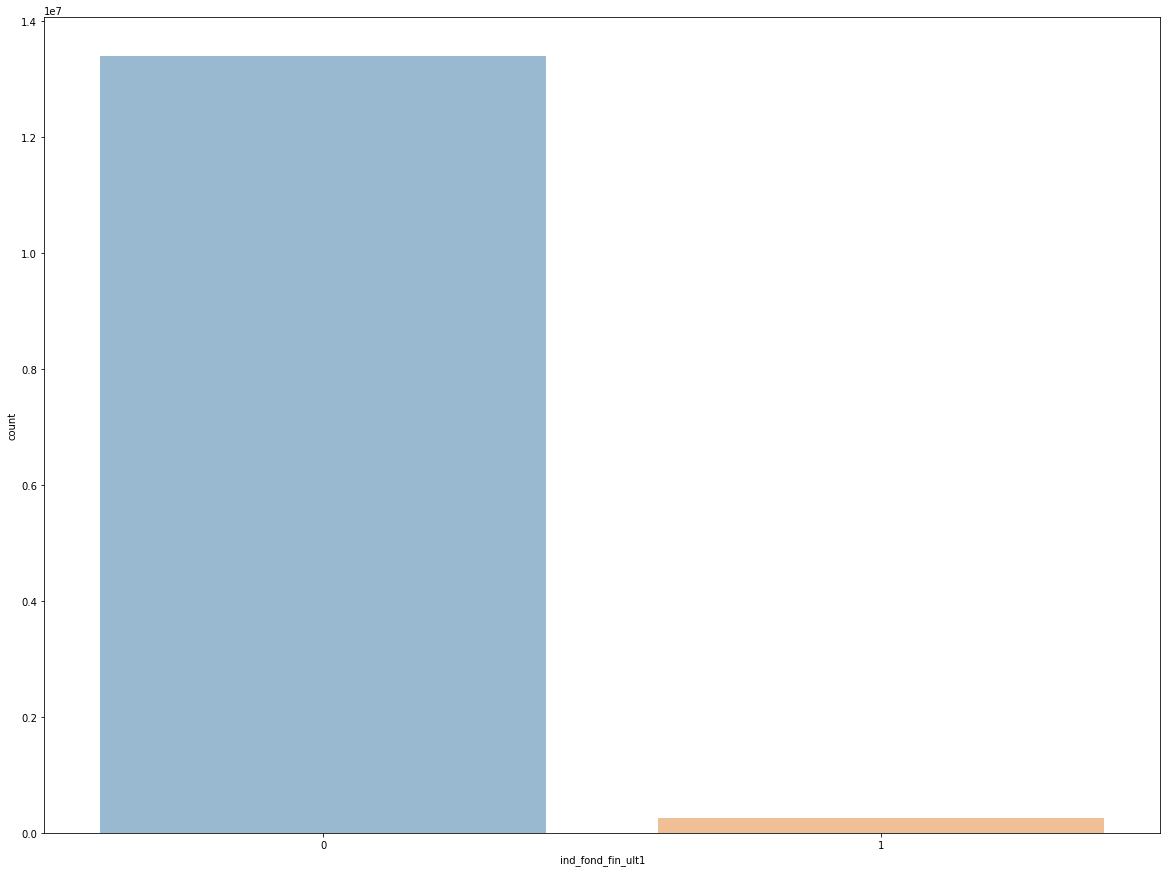

--------------------------------------------------
col:  ind_hip_fin_ult1


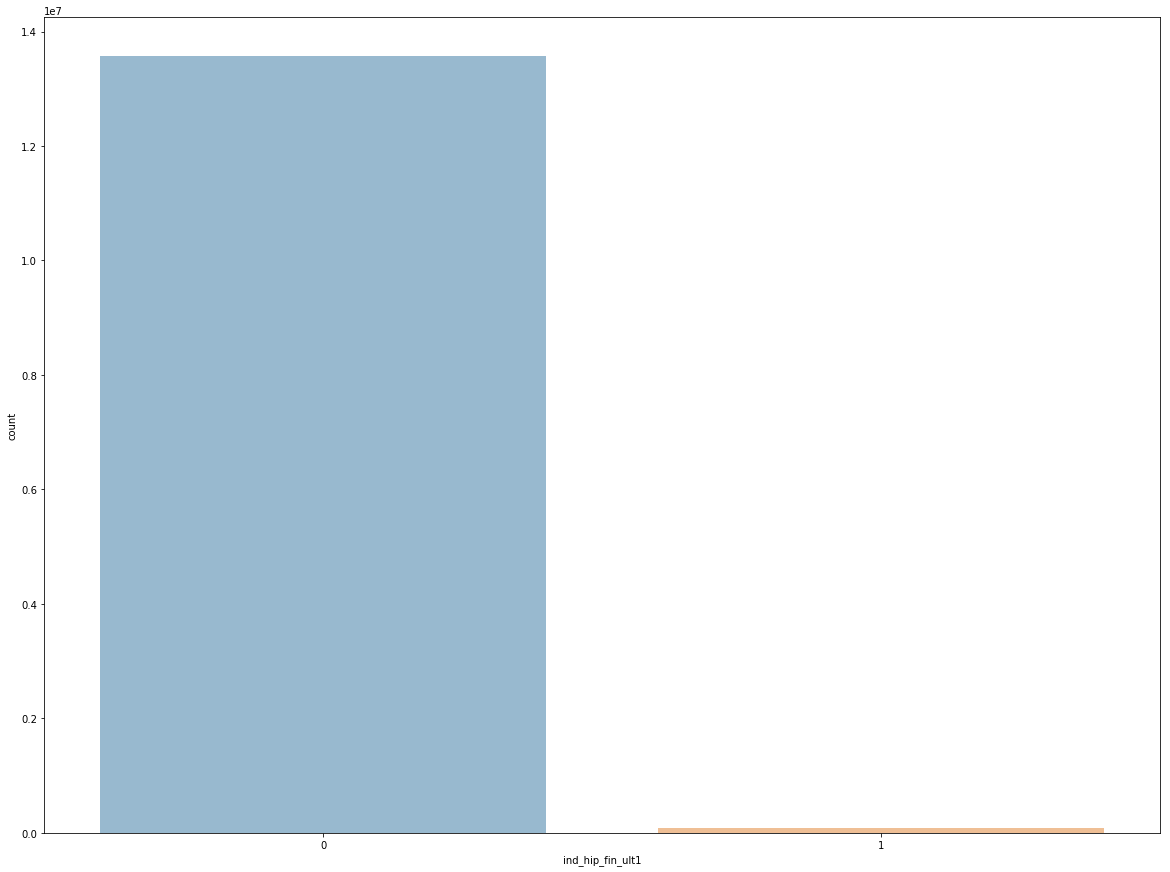

--------------------------------------------------
col:  ind_plan_fin_ult1


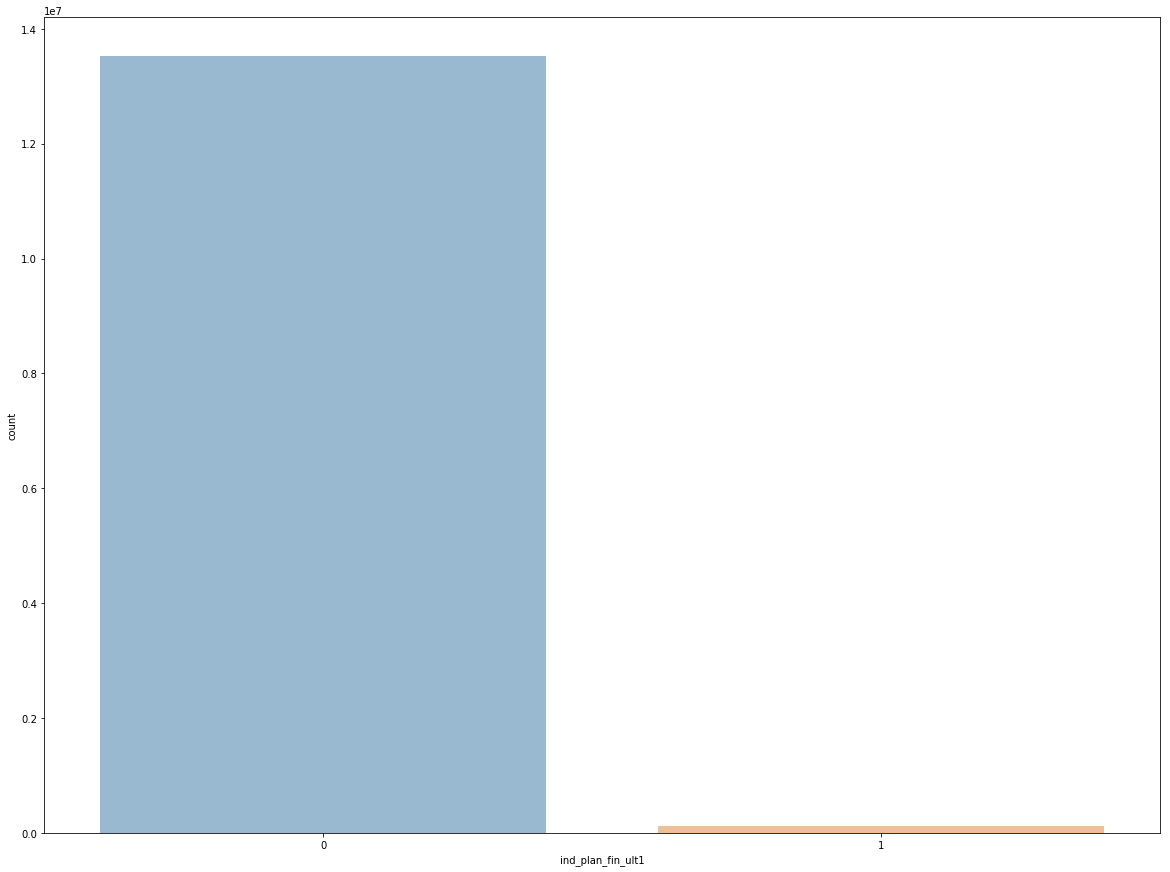

--------------------------------------------------
col:  ind_pres_fin_ult1


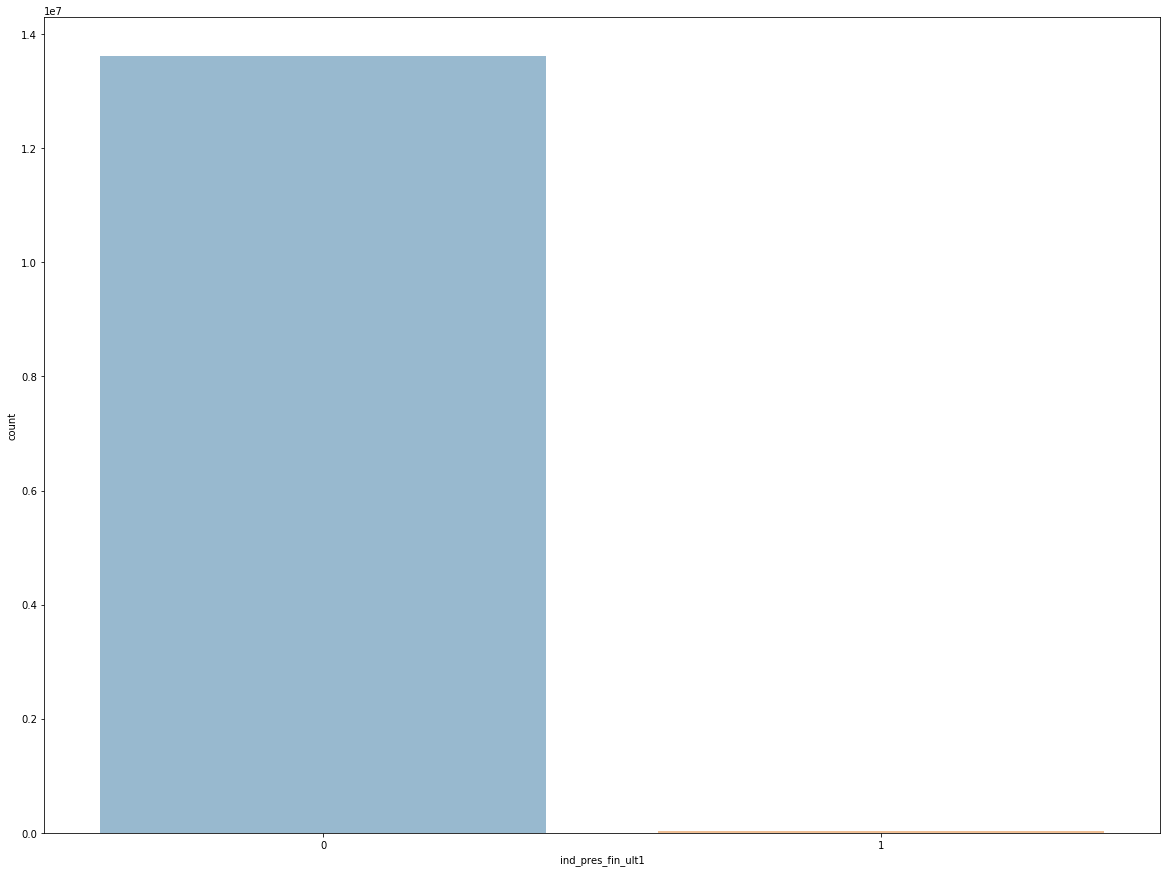

--------------------------------------------------
col:  ind_reca_fin_ult1


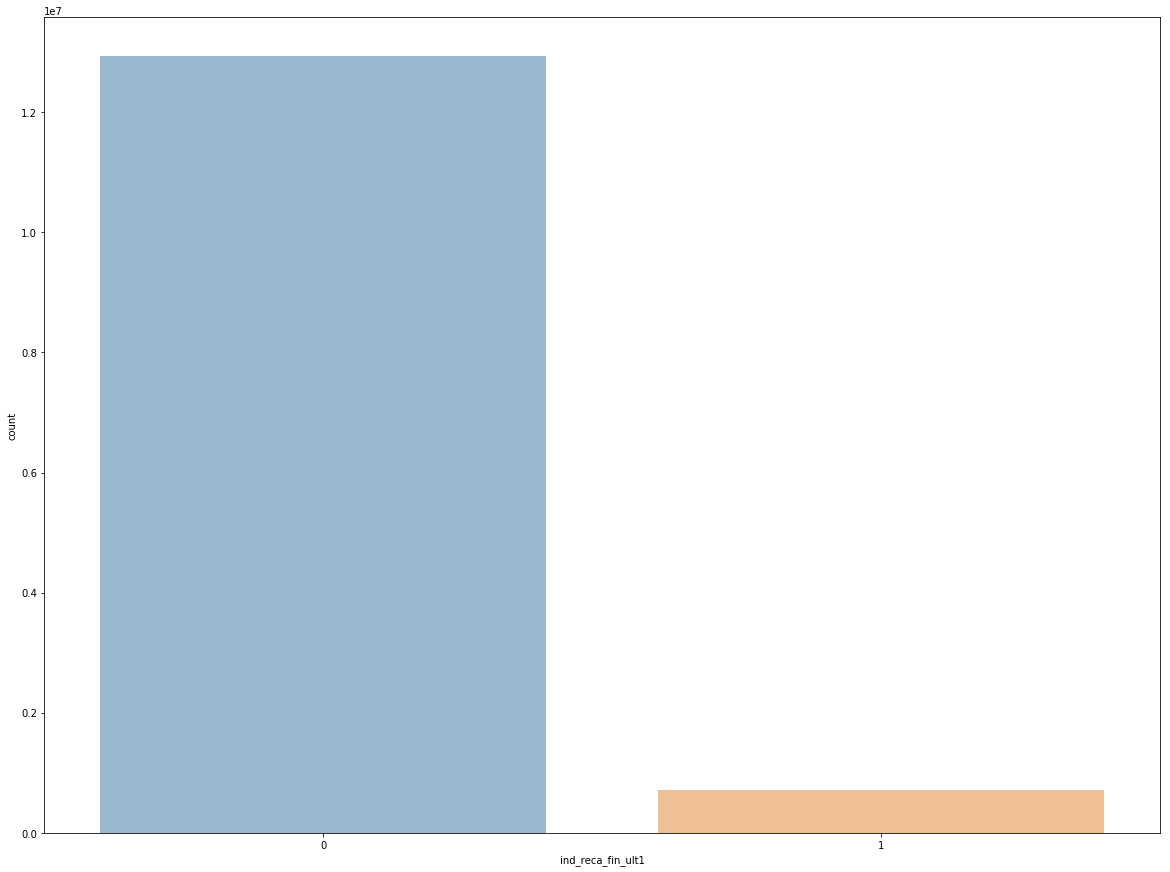

--------------------------------------------------
col:  ind_tjcr_fin_ult1


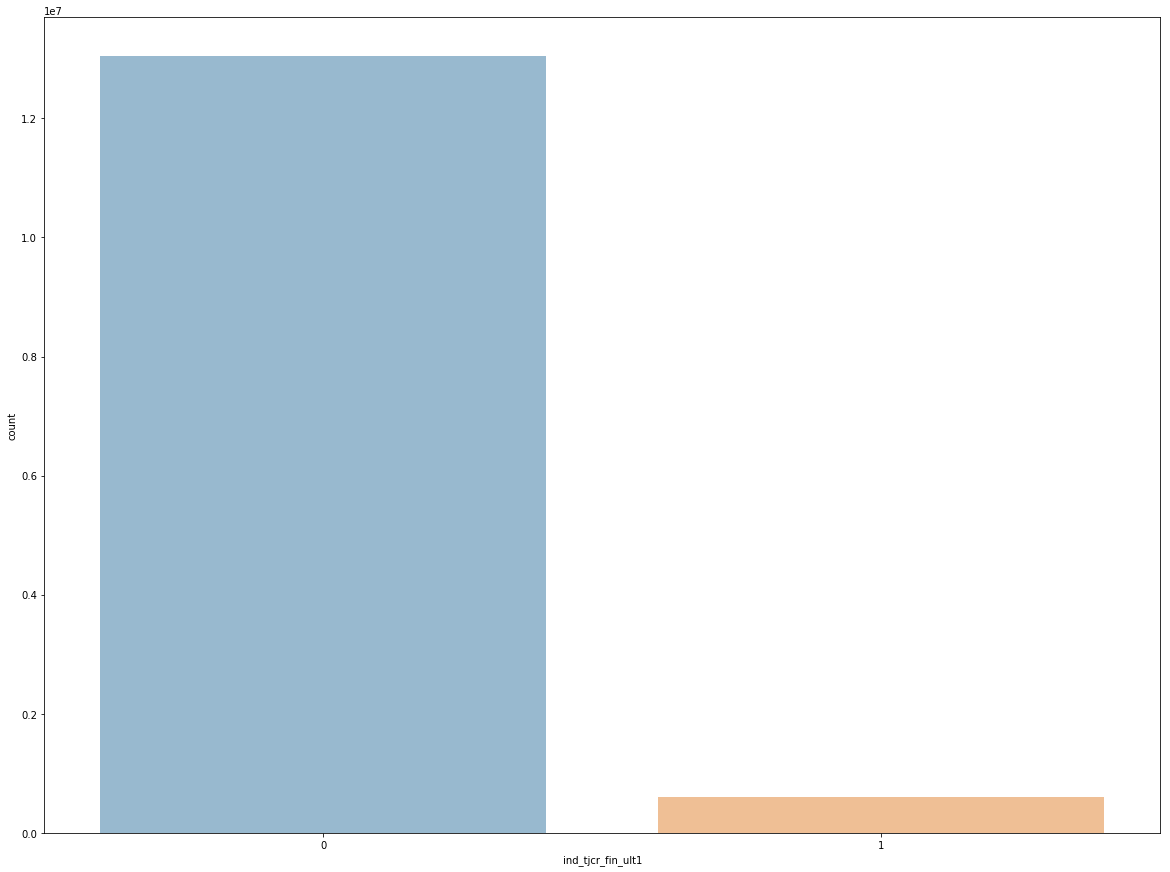

--------------------------------------------------
col:  ind_valo_fin_ult1


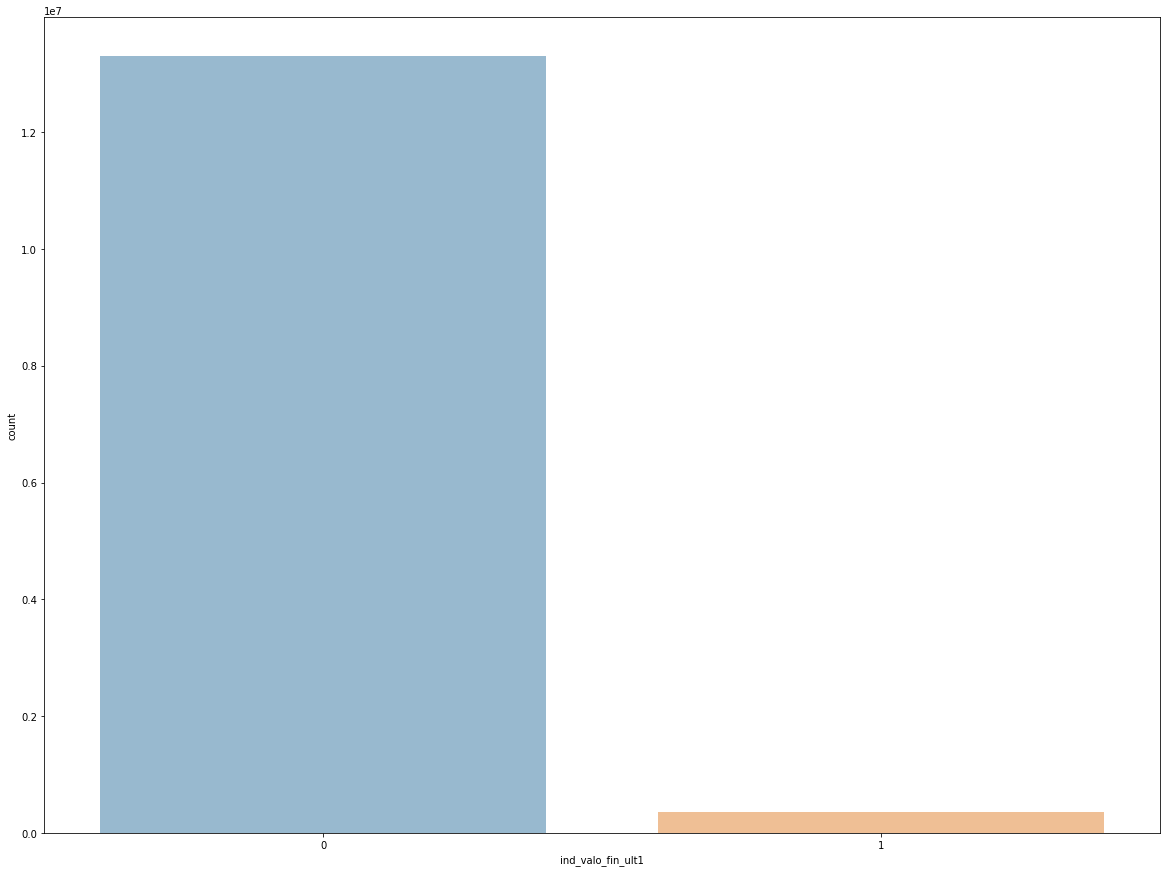

--------------------------------------------------
col:  ind_viv_fin_ult1


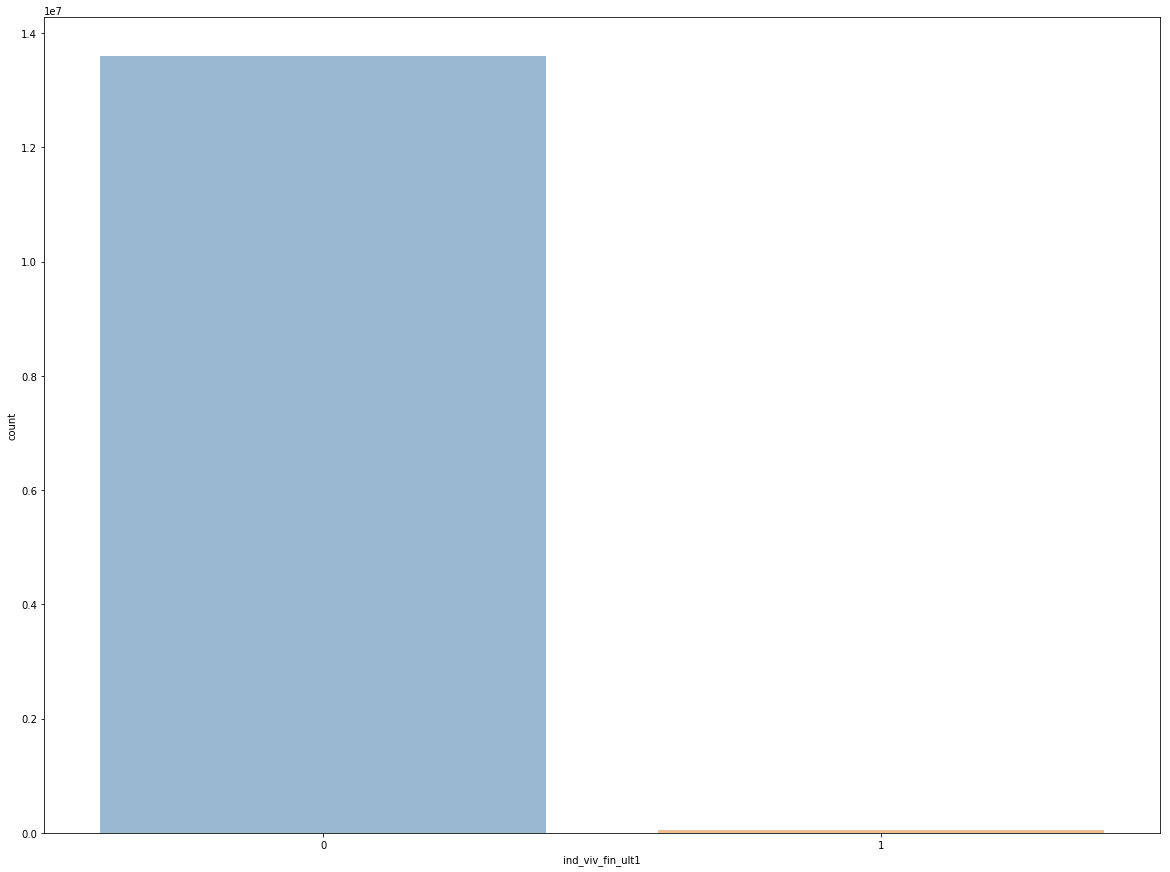

--------------------------------------------------
col:  ind_nomina_ult1


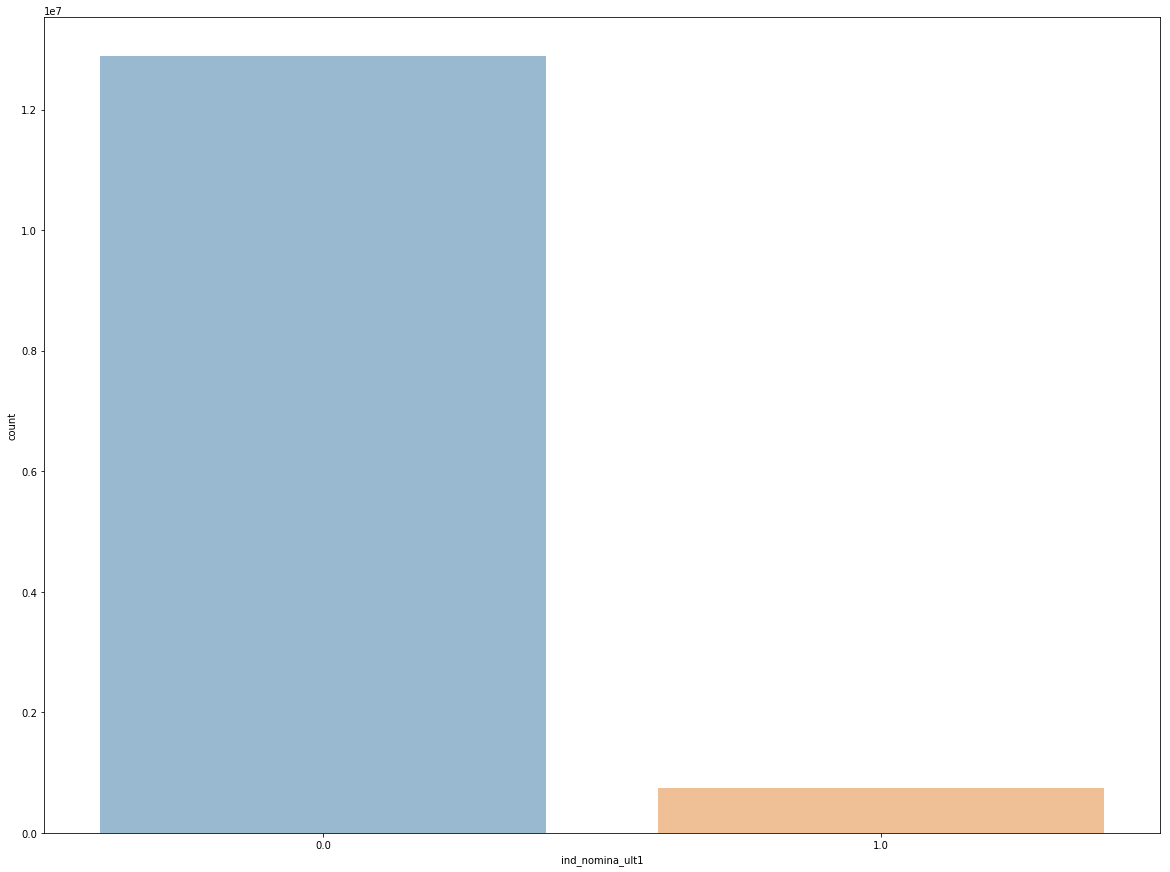

--------------------------------------------------
col:  ind_nom_pens_ult1


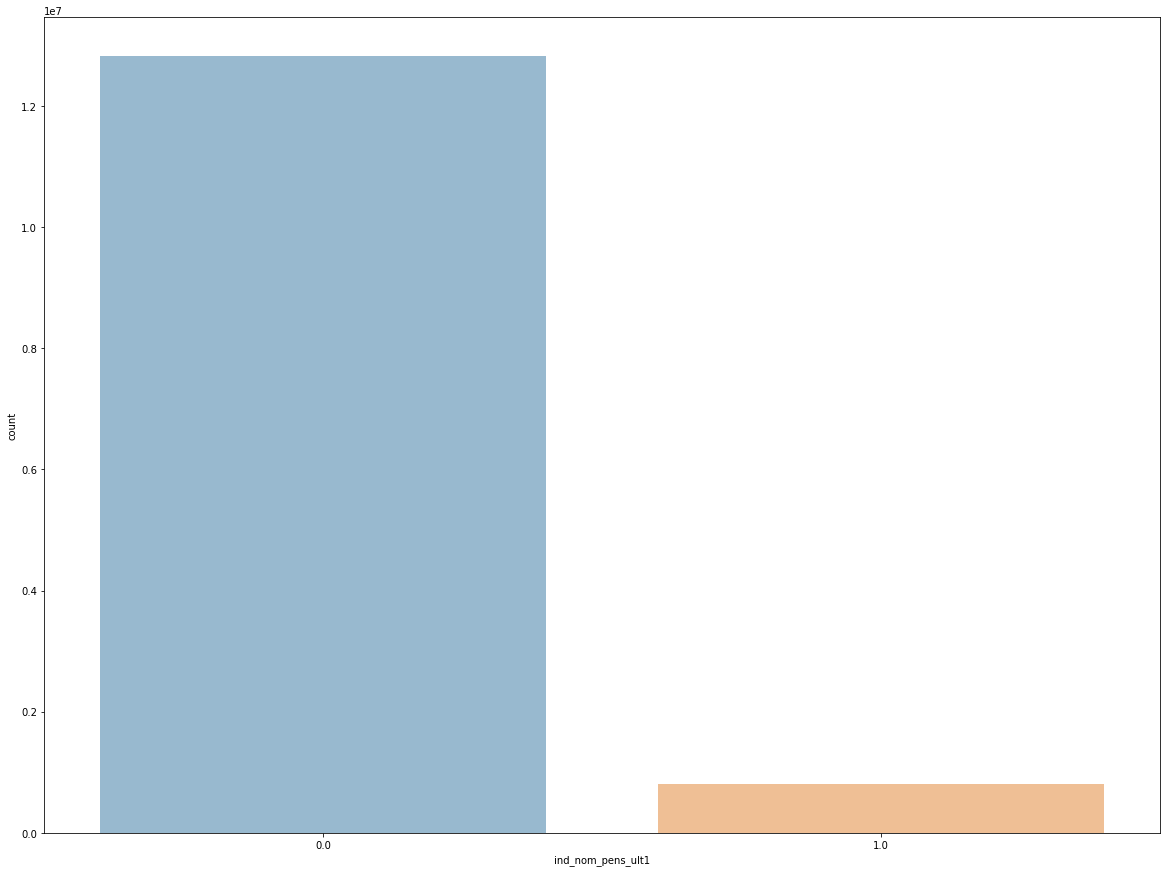

--------------------------------------------------
col:  ind_recibo_ult1


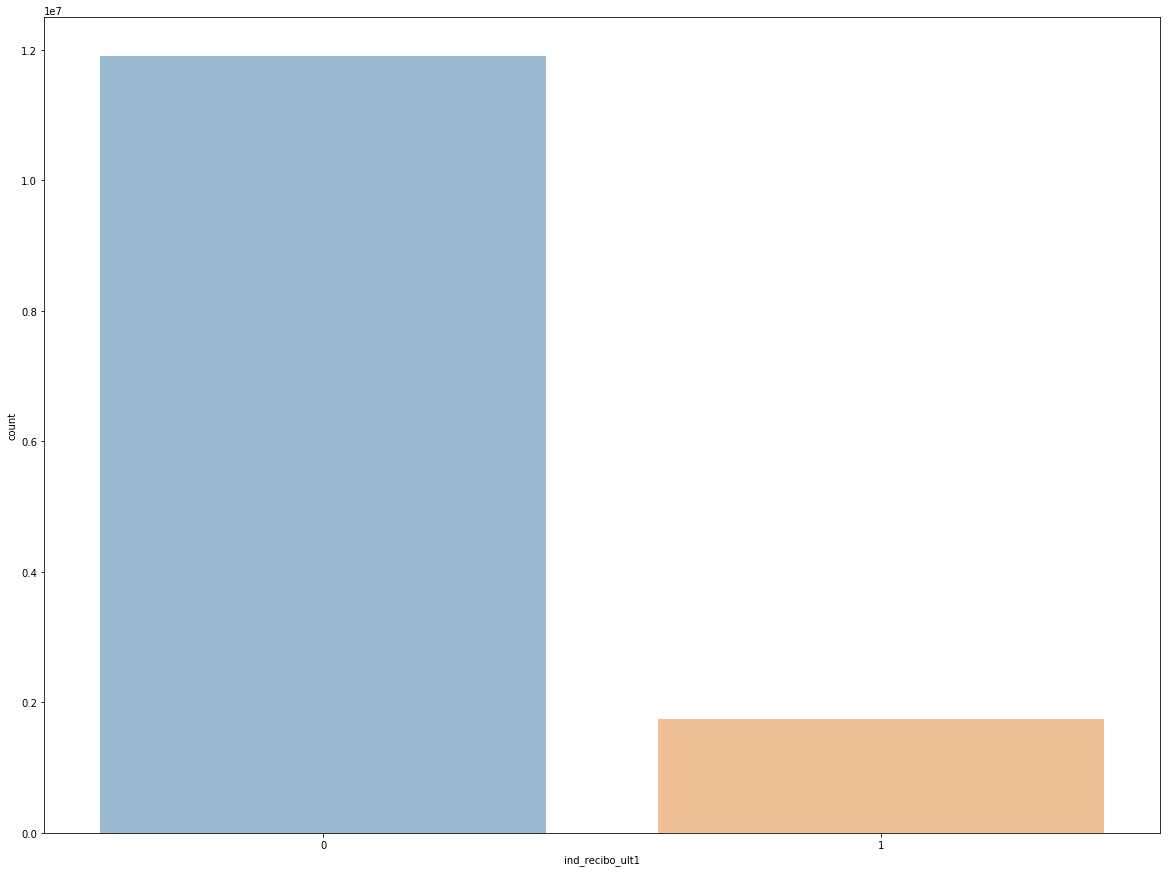

In [10]:
skip_cols = ['ncodpers','renta']
for col in trn.columns:
    #출력에 너무 시간이 많이 걸리는 두 변수는 skip
    if col in skip_cols:
        continue
    
    print('-'*50)
    print('col: ', col)
    
    #그래프의 크기를 figsize
    f, ax = plt.subplots(figsize = (20,15))
    #seaborn을 사용한 막대그래프 생성
    sns.countplot(x = col, data = trn, alpha =0.5)
    plt.show()

## 시계열 데이터 시각화

##### 월별 금융제품 보유 데이터를 누적 막대 그래프로 시각화

In [11]:
#날짜 데이터를 기준으로 분석하기 위하여 날짜 데이터 별도로 추출
months = trn['fecha_dato'].unique().tolist()

#제품 변수 24개 추출
label_cols = trn.columns[24:].tolist()

In [12]:
label_over_time = []
for i in range(len(label_cols)):
    #매월, 각 제품의 총합을 groupby(..).agg('sum')으로 계산하여 label_sum 에 저장
    label_sum = trn.groupby(['fecha_dato'])[label_cols[i]].agg('sum')
    label_over_time.append(label_sum.tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    #누적 막대 그래프를 시각화 하기 위하여, n번째 제품의 총합을 1~n 번째 제품의 총합으로 만든다.
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis = 0))

In [13]:
color_list= ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

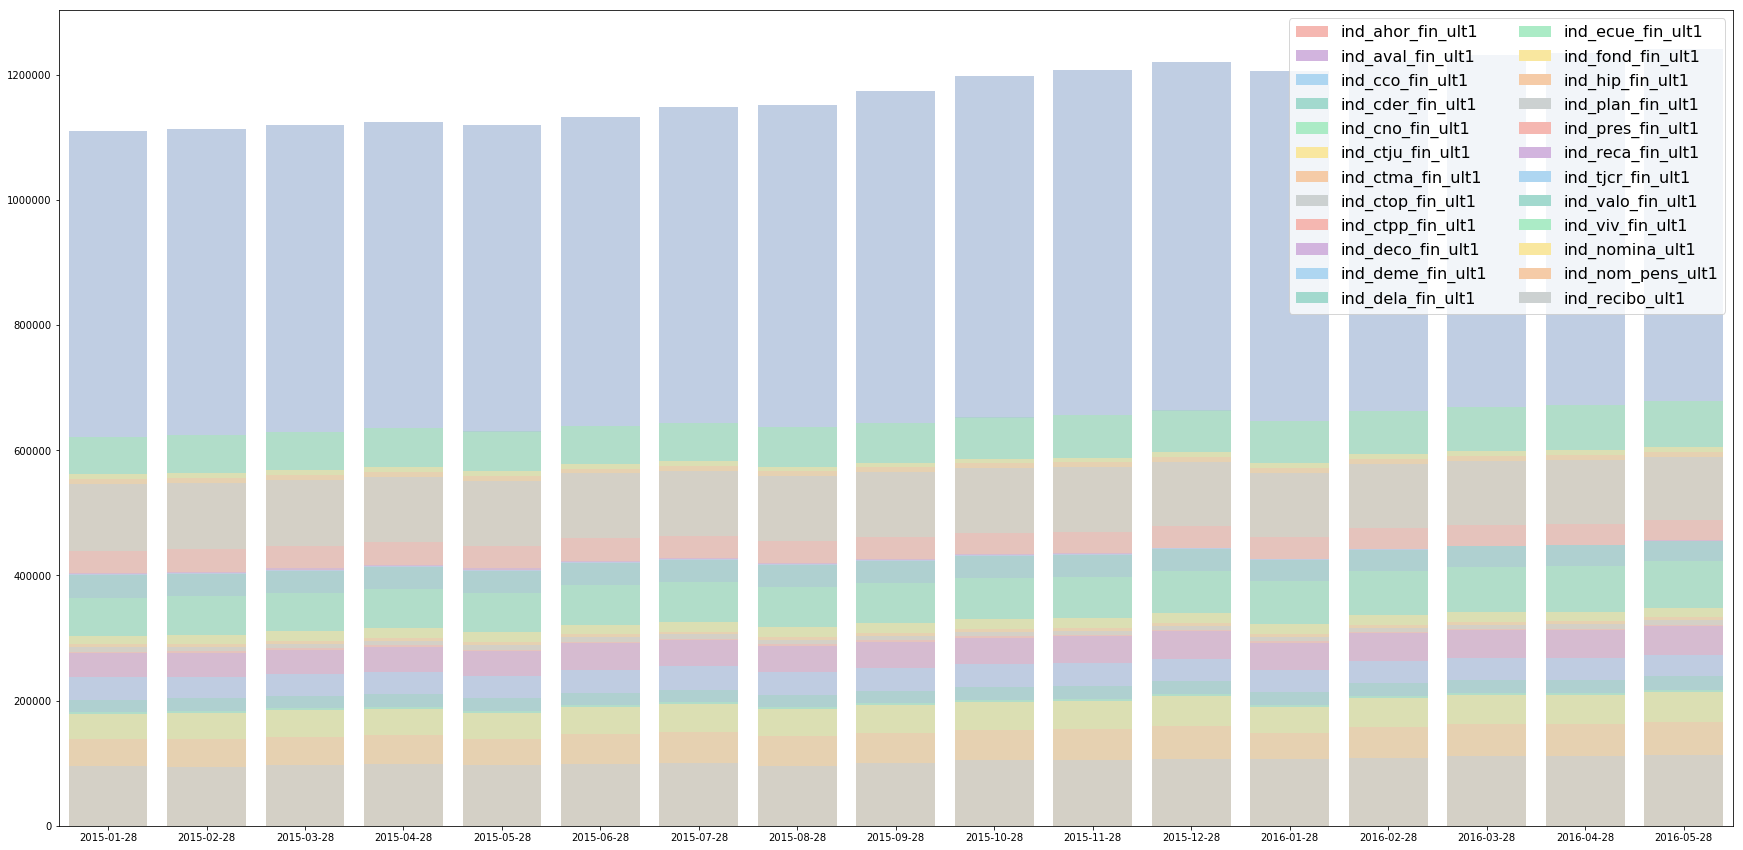

In [14]:
f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
    #24개 제품에 대한 histogram
    #x축은 월 데이터, y축은 누적 총합, 색깔은 8개 번갈아 가며 사용, 그림의 알파는 0.7
    sns.barplot(x = months, y= label_sum_over_time[i], color = color_list[i%8],alpha= 0.7)
#우측 상단에 legend 추가
plt.legend([plt.Rectangle((0,0),1,1, fc = color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc = 1, ncol = 2, prop={'size':16})

그래프에서 꾸준히 늘고 있음을 확인할 수 있음 > 고객의 명수가 늘고 있다.

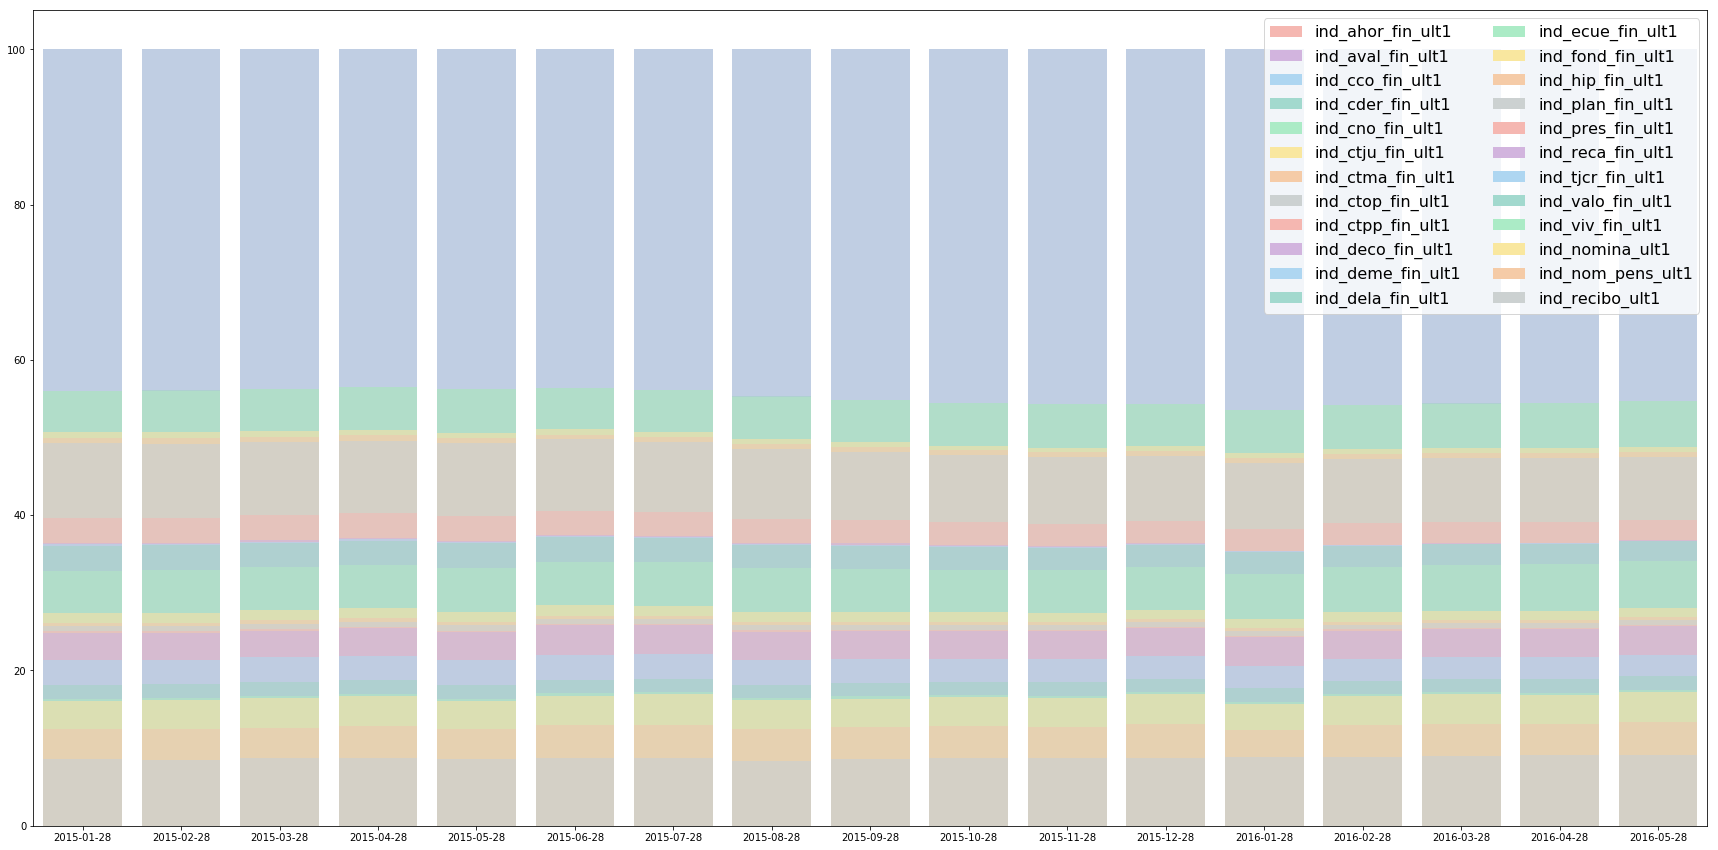

In [15]:
#절대값이 아닌 상대값으로 시각화
label_sum_percent = (label_sum_over_time/(1.*np.asarray(label_sum_over_time).max(axis = 0))) * 100

f, ax = plt.subplots(figsize = (30,15))
for i in range(len(label_cols)):
    sns.barplot(x = months, y=label_sum_percent[i], color = color_list[i %8], alpha =0.7)
plt.legend([plt.Rectangle((0,0),1,1, fc = color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc = 1, ncol = 2, prop={'size':16})

제일 마지막 값 ("ind_cco_fin_ult1")의 보유량은 계절의 상관없이 꾸준히 높음
> 월별에 따른 유의미한 값은 찾지 못함

# '신규구매'여부 추출하기 위한 코드

In [16]:
trn = pd.read_csv('./input/train_ver2.csv')
#제품 변수를 prods에 저장
prods = trn.columns[24:].tolist()

C:\Users\woojung\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
len(trn['ncodpers'].unique()) #956645
len(trn['ncodpers']) #13647309

13647309

In [18]:
#날짜를 숫자로 변환하는 함수
def date_to_int(str_date):
    Y,M,D = [int(a) for a in str_date.strip().split("-")]
    int_date = (int(Y)-2015) * 12 + int(M)
    return int_date

In [19]:
# 날짜를 숫자로 변환하여 'int_date'에 입력
trn['int_date'] = trn['fecha_dato'].map(date_to_int).astype(np.int8)

In [20]:
#데이터를 복사하고, int_date 날짜에 1을 더하여 lag 생성. 변수명에 _prev를 추가
trn_lag  = trn.copy()
trn_lag['int_date'] +=1

In [21]:
trn_lag[['ncodpers','int_date']].head()

,ncodpers,int_date
0,1375586,2
1,1050611,2
2,1050612,2
3,1050613,2
4,1050614,2


In [22]:
trn_lag.columns = [col + '_prev' if col not in ['ncodpers','int_date']else col for col in trn.columns]
#ncodpers:고객 고유 번호

In [23]:
trn_lag.columns #previous label 값이라고 정해줌

Index(['fecha_dato_prev', 'ncodpers', 'ind_empleado_prev',
       'pais_residencia_prev', 'sexo_prev', 'age_prev', 'fecha_alta_prev',
       'ind_nuevo_prev', 'antiguedad_prev', 'indrel_prev',
       'ult_fec_cli_1t_prev', 'indrel_1mes_prev', 'tiprel_1mes_prev',
       'indresi_prev', 'indext_prev', 'conyuemp_prev', 'canal_entrada_prev',
       'indfall_prev', 'tipodom_prev', 'cod_prov_prev', 'nomprov_prev',
       'ind_actividad_cliente_prev', 'renta_prev', 'segmento_prev',
       'ind_ahor_fin_ult1_prev', 'ind_aval_fin_ult1_prev',
       'ind_cco_fin_ult1_prev', 'ind_cder_fin_ult1_prev',
       'ind_cno_fin_ult1_prev', 'ind_ctju_fin_ult1_prev',
       'ind_ctma_fin_ult1_prev', 'ind_ctop_fin_ult1_prev',
       'ind_ctpp_fin_ult1_prev', 'ind_deco_fin_ult1_prev',
       'ind_deme_fin_ult1_prev', 'ind_dela_fin_ult1_prev',
       'ind_ecue_fin_ult1_prev', 'ind_fond_fin_ult1_prev',
       'ind_hip_fin_ult1_prev', 'ind_plan_fin_ult1_prev',
       'ind_pres_fin_ult1_prev', 'ind_reca_fin_ult1

In [24]:
trn[['ind_cco_fin_ult1']].head()

,ind_cco_fin_ult1
0,1
1,1
2,1
3,0
4,1


In [25]:
trn_lag[['ind_cco_fin_ult1_prev']].head()

,ind_cco_fin_ult1_prev
0,1
1,1
2,1
3,0
4,1


In [26]:
trn_lag.head()

,fecha_dato_prev,ncodpers,ind_empleado_prev,pais_residencia_prev,sexo_prev,age_prev,fecha_alta_prev,ind_nuevo_prev,antiguedad_prev,indrel_prev,...,ind_plan_fin_ult1_prev,ind_pres_fin_ult1_prev,ind_reca_fin_ult1_prev,ind_tjcr_fin_ult1_prev,ind_valo_fin_ult1_prev,ind_viv_fin_ult1_prev,ind_nomina_ult1_prev,ind_nom_pens_ult1_prev,ind_recibo_ult1_prev,int_date
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2


In [27]:
#원본데이터와 lag 데이터를 ncodper 와 int_date 기준으로 합친다. 
# lag데이터의 int_date는 1 밀려 있기 때문에, 저번 달의 제품 정보가 삽입됨

## 위에서 설정해준 prev의 column까지 merge함. 변화를 안준  'ncodpers'와 'int_date'까지

df_trn = trn.merge(trn_lag, on = ['ncodpers','int_date'], how = 'left')

In [28]:
df_trn.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1_prev,ind_plan_fin_ult1_prev,ind_pres_fin_ult1_prev,ind_reca_fin_ult1_prev,ind_tjcr_fin_ult1_prev,ind_valo_fin_ult1_prev,ind_viv_fin_ult1_prev,ind_nomina_ult1_prev,ind_nom_pens_ult1_prev,ind_recibo_ult1_prev
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#메모리 효율을 위한 불필요한 변수 제거
del trn, trn_lag

In [30]:
#저번달의 제품 정보가 존재하지 않을 경우를 대비하여 0으로 대체
for prod in prods:
    prev = prod + '_prev'
    df_trn[prev].fillna(0, inplace=True)

In [31]:
df_trn[['ind_cco_fin_ult1_add']].head()

KeyError: "None of [Index(['ind_cco_fin_ult1_add'], dtype='object')] are in the [columns]"

In [34]:
df_trn[['ind_cco_fin_ult1_prev']].head()

,ind_cco_fin_ult1_prev
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [35]:
df_trn[['ind_cco_fin_ult1']].head()

,ind_cco_fin_ult1
0,1
1,1
2,1
3,0
4,1


In [36]:
#원본데이터에서 제품 보유 여부-lag 데이터에서의 제품 보유 여부를 비교하여 신규구매 변수 padd를 구한다.
for prod in prods:
    padd = prod + '_add'
    prev = prod + '_prev'
    df_trn[padd] = ((df_trn[prod]==1)& (df_trn[prev]==0)).astype(np.int8)
    print(df_trn[padd])

0           0
1           0
2           0
3           0
4           0
           ..
13647304    0
13647305    0
13647306    0
13647307    0
13647308    0
Name: ind_ahor_fin_ult1_add, Length: 13647309, dtype: int8
0           0
1           0
2           0
3           0
4           0
           ..
13647304    0
13647305    0
13647306    0
13647307    0
13647308    0
Name: ind_aval_fin_ult1_add, Length: 13647309, dtype: int8
0           1
1           1
2           1
3           0
4           1
           ..
13647304    0
13647305    0
13647306    0
13647307    0
13647308    1
Name: ind_cco_fin_ult1_add, Length: 13647309, dtype: int8
0           0
1           0
2           0
3           0
4           0
           ..
13647304    0
13647305    0
13647306    0
13647307    0
13647308    0
Name: ind_cder_fin_ult1_add, Length: 13647309, dtype: int8
0           0
1           0
2           0
3           0
4           0
           ..
13647304    0
13647305    0
13647306    0
13647307    0
13647308 

In [37]:
df_trn

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1_add,ind_plan_fin_ult1_add,ind_pres_fin_ult1_add,ind_reca_fin_ult1_add,ind_tjcr_fin_ult1_add,ind_valo_fin_ult1_add,ind_viv_fin_ult1_add,ind_nomina_ult1_add,ind_nom_pens_ult1_add,ind_recibo_ult1_add
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0,0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0,0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0,0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
#신규구매 변수만을 추출하여 labels에 저장한다
add_cols = [prod + '_add' for prod in prods]
labels = df_trn[add_cols].copy()

In [39]:
labels.columns

Index(['ind_ahor_fin_ult1_add', 'ind_aval_fin_ult1_add',
       'ind_cco_fin_ult1_add', 'ind_cder_fin_ult1_add', 'ind_cno_fin_ult1_add',
       'ind_ctju_fin_ult1_add', 'ind_ctma_fin_ult1_add',
       'ind_ctop_fin_ult1_add', 'ind_ctpp_fin_ult1_add',
       'ind_deco_fin_ult1_add', 'ind_deme_fin_ult1_add',
       'ind_dela_fin_ult1_add', 'ind_ecue_fin_ult1_add',
       'ind_fond_fin_ult1_add', 'ind_hip_fin_ult1_add',
       'ind_plan_fin_ult1_add', 'ind_pres_fin_ult1_add',
       'ind_reca_fin_ult1_add', 'ind_tjcr_fin_ult1_add',
       'ind_valo_fin_ult1_add', 'ind_viv_fin_ult1_add', 'ind_nomina_ult1_add',
       'ind_nom_pens_ult1_add', 'ind_recibo_ult1_add'],
      dtype='object')

In [40]:
labels.columns = prods

In [41]:
labels.columns

Index(['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [42]:
labels.to_csv('./input/labels.csv', index = False) #csv파일로 제작

### 생성한 labels.csv파일을 이용하여 누적 막대 그래프로 시각화하기

In [43]:
labels = pd.read_csv("./input/labels.csv").astype(int)
fecha_dato = pd.read_csv('./input/train_ver2.csv', usecols = ['fecha_dato'])

In [44]:
labels['date'] = fecha_dato.fecha_dato
months = np.unique(fecha_dato.fecha_dato).tolist()
label_cols = labels.columns.tolist()[:24]

In [45]:
label_over_time = []
for i in range(len(label_cols)):
    label_over_time.append(labels.groupby(['date'])[label_cols[i]].agg('sum').tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    #누적 막대 그래프를 시각화 하기 위하여, n번째 제품의 총합을 1~n 번째 제품의 총합으로 만든다.
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis = 0))

In [46]:
color_list= ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

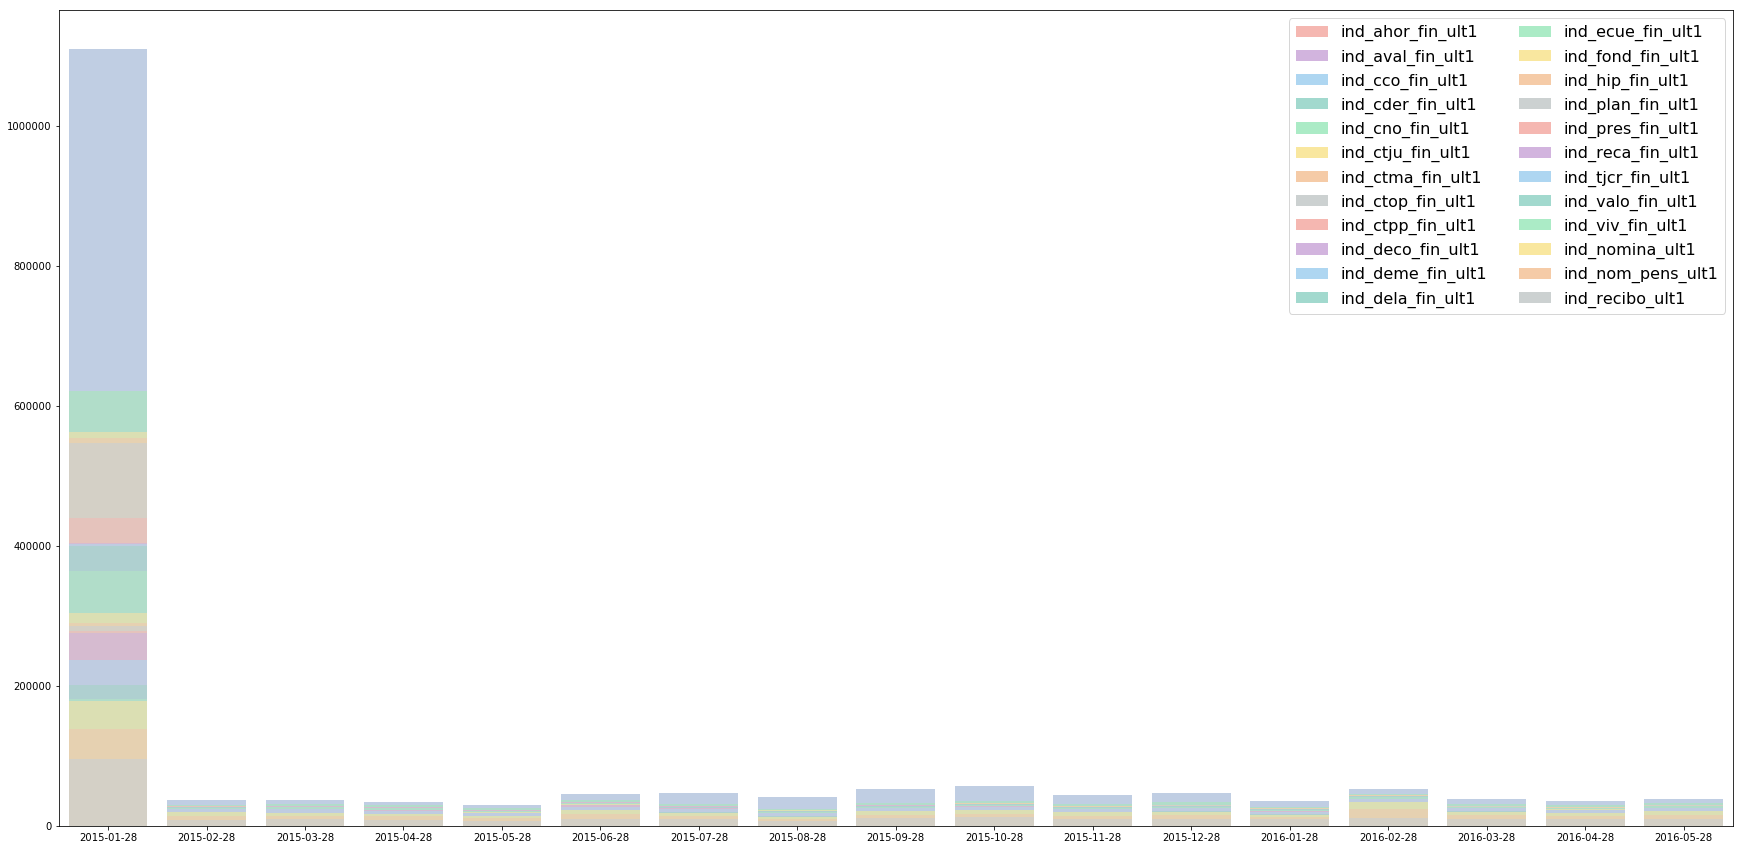

In [47]:
f,ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y= label_sum_over_time[i], color = color_list[i%8], alpha = 0.7)
plt.legend([plt.Rectangle((0,0),1,1,fc = color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc =1, ncol = 2, prop = {'size': 16})

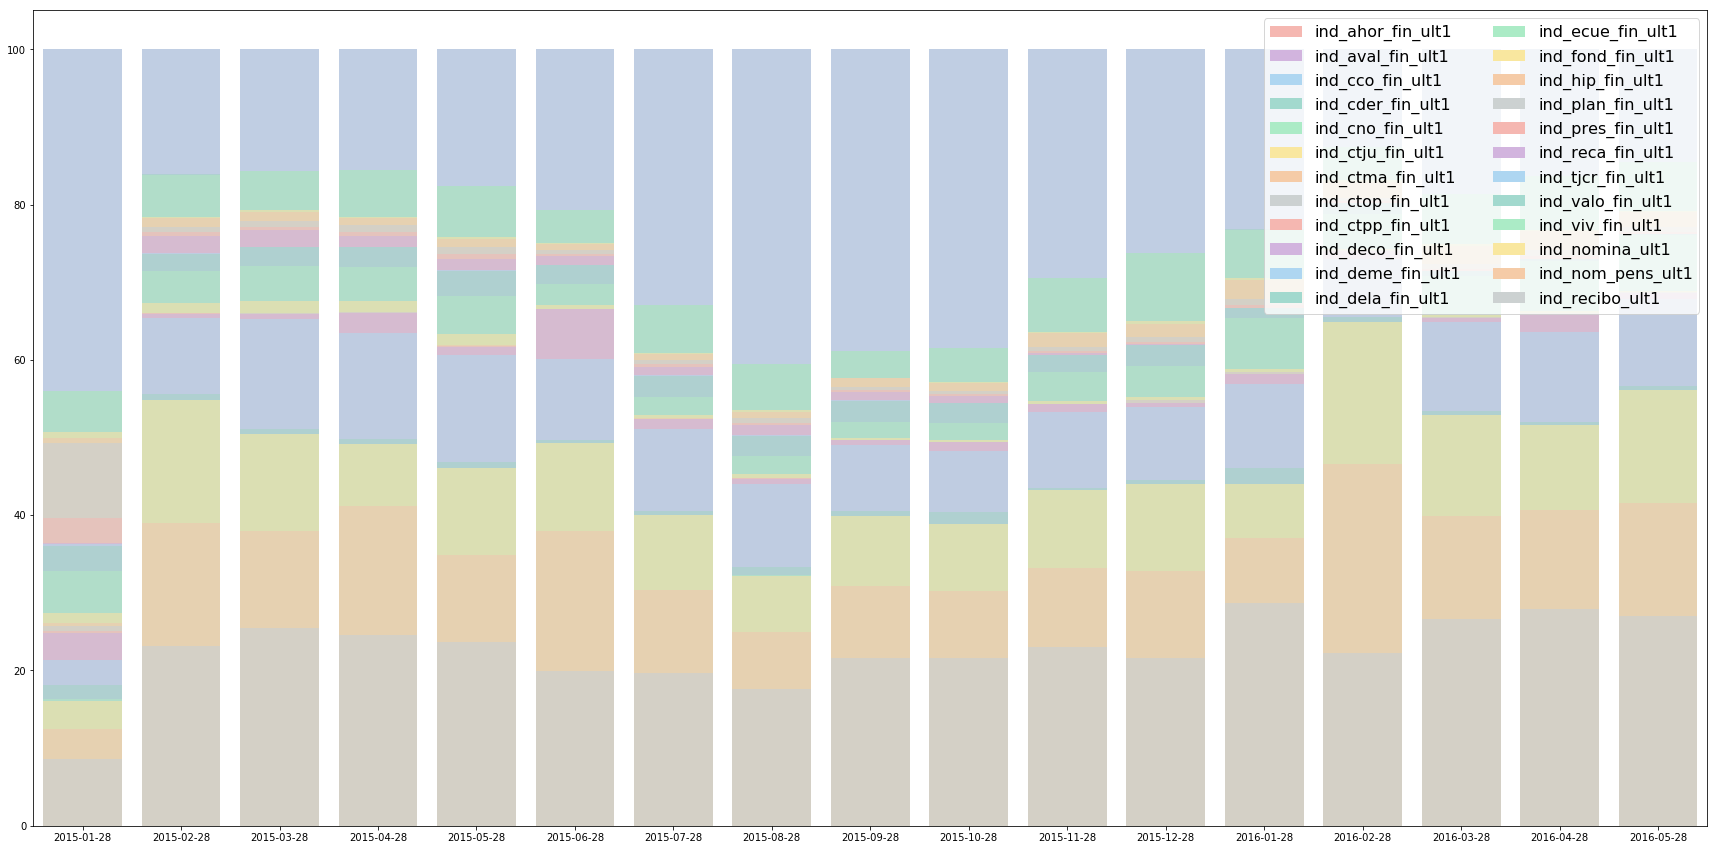

In [48]:
#절대값이 아닌 상대값으로 시각화
label_sum_percent = (label_sum_over_time/(1.*np.asarray(label_sum_over_time).max(axis = 0))) * 100

f, ax = plt.subplots(figsize = (30,15))
for i in range(len(label_cols)):
    sns.barplot(x = months, y=label_sum_percent[i], color = color_list[i %8], alpha =0.7)
plt.legend([plt.Rectangle((0,0),1,1, fc = color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], label_cols, loc = 1, ncol = 2, prop={'size':16})